In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Project imports
import sys
sys.path.append('..')
from src.config import (
    SEED, DATA_DIR, FIGURES_DIR,
    ID_COL, TARGET_COL, CLAIM_NB_COL, EXPOSURE_COL,
    CATEGORICAL_FEATURES, NUMERICAL_FEATURES, ALL_FEATURES,
    ORDINAL_FEATURES, NOMINAL_FEATURES, AREA_ORDER
)

# Set random seed for reproducibility
np.random.seed(SEED)

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(f"Imports successful.")
print(f"Random seed set to: {SEED}")
print(f"Data directory: {DATA_DIR}")
print(f"Figures directory: {FIGURES_DIR}")

Imports successful.
Random seed set to: 42
Data directory: /Users/matteo/Desktop/TRYG_ML/notebooks/../data
Figures directory: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures


In [2]:
# Load train,test data
train_path = DATA_DIR / 'claims_train.csv'
test_path = DATA_DIR / 'claims_test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")
print(f"Total samples: {df_train.shape[0] + df_test.shape[0]:,}")
print(f"\nData loaded.")

Training set shape: (542410, 12)
Test set shape: (135603, 12)
Total samples: 678,013

Data loaded.


In [3]:
# Print first few rows
df_train.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
1,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
2,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
3,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
4,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53


In [4]:
# Print dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542410 entries, 0 to 542409
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       542410 non-null  float64
 1   ClaimNb     542410 non-null  int64  
 2   Exposure    542410 non-null  float64
 3   Area        542410 non-null  object 
 4   VehPower    542410 non-null  int64  
 5   VehAge      542410 non-null  int64  
 6   DrivAge     542410 non-null  int64  
 7   BonusMalus  542410 non-null  int64  
 8   VehBrand    542410 non-null  object 
 9   VehGas      542410 non-null  object 
 10  Density     542410 non-null  int64  
 11  Region      542410 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 49.7+ MB


In [5]:
# Print numerical features
df_train.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,5.424100e+05,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000,542410.000000
mean,2.623260e+06,0.053122,0.528840,6.453281,7.045768,45.503164,59.761546,1796.176180
std,1.641809e+06,0.238785,0.364463,2.050506,5.660827,14.135435,15.639321,3965.475251
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.158401e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272434e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046606e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1662.000000
max,6.114330e+06,11.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [6]:
# Print missing values
print("MISSING VALUES:")
missing = df_train.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")
print(f"OK, No missing values" if missing.sum() == 0 else "NOT OK! Found missing values")

MISSING VALUES:
IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

Total missing values: 0
OK, No missing values


In [7]:
# Check for duplicates
print("Duplicate Check:")
duplicates = df_train.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
print(f"OK, No duplicates" if duplicates == 0 else f"NOT OK! Found {duplicates} duplicates")

unique_ids = df_train[ID_COL].nunique()
print(f"\nUnique policy IDs: {unique_ids:,}")
print(f"Total rows: {len(df_train):,}")
print(f"OK, All IDs are unique" if unique_ids == len(df_train) else "NOT OK! Some IDs appear multiple times")

Duplicate Check:
Duplicate rows: 0
OK, No duplicates

Unique policy IDs: 542,410
Total rows: 542,410
OK, All IDs are unique


In [8]:
# Analyze ClaimNb
print("ClaimNb (Number of Claims) Analysis:")
print(df_train[CLAIM_NB_COL].describe())
print(f"\nValue counts:")
print(df_train[CLAIM_NB_COL].value_counts().sort_index().head(10))
print(f"\nMax claims: {df_train[CLAIM_NB_COL].max()}")
print(f"Claims > 0: {(df_train[CLAIM_NB_COL] > 0).sum():,} ({(df_train[CLAIM_NB_COL] > 0).mean()*100:.2f}%)")
print(f"Claims = 0: {(df_train[CLAIM_NB_COL] == 0).sum():,} ({(df_train[CLAIM_NB_COL] == 0).mean()*100:.2f}%)")

ClaimNb (Number of Claims) Analysis:
count    542410.000000
mean          0.053122
std           0.238785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: ClaimNb, dtype: float64

Value counts:
ClaimNb
0     515199
1      25718
2       1416
3         67
4          4
5          2
6          1
9          1
11         2
Name: count, dtype: int64

Max claims: 11
Claims > 0: 27,211 (5.02%)
Claims = 0: 515,199 (94.98%)


In [9]:
# Analyze Exposure
print("Exposure (Time at Risk) Analysis:")
print(df_train[EXPOSURE_COL].describe())
print(f"\nExposure range: [{df_train[EXPOSURE_COL].min():.4f}, {df_train[EXPOSURE_COL].max():.4f}]")
print(f"Exposure > 1: {(df_train[EXPOSURE_COL] > 1).sum()} rows")
print(f"Exposure = 1 (full year): {(df_train[EXPOSURE_COL] == 1).sum():,} ({(df_train[EXPOSURE_COL] == 1).mean()*100:.2f}%)")

Exposure (Time at Risk) Analysis:
count    542410.000000
mean          0.528840
std           0.364463
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64

Exposure range: [0.0027, 2.0100]
Exposure > 1: 994 rows
Exposure = 1 (full year): 134,483 (24.79%)


In [10]:
# Data Cleaning: Remove datapoints with Exposure > 1
print("Data Cleaning: Exposure Analysis:")
print(f"Exposure range before cleaning: [{df_train[EXPOSURE_COL].min():.4f}, {df_train[EXPOSURE_COL].max():.4f}]")
print(f"Datapoints with Exposure > 1: {(df_train[EXPOSURE_COL] > 1).sum():,}")

# Remove datapoints with Exposure > 1
df_train_before = len(df_train)
df_train = df_train[df_train[EXPOSURE_COL] <= 1].copy()
df_train_after = len(df_train)

print(f"\nRemoved {df_train_before - df_train_after:,} datapoints ({(df_train_before - df_train_after)/df_train_before*100:.2f}%)")
print(f"Training set shape after cleaning: {df_train.shape}")
print(f"Exposure range after cleaning: [{df_train[EXPOSURE_COL].min():.4f}, {df_train[EXPOSURE_COL].max():.4f}]")

Data Cleaning: Exposure Analysis:
Exposure range before cleaning: [0.0027, 2.0100]
Datapoints with Exposure > 1: 994

Removed 994 datapoints (0.18%)
Training set shape after cleaning: (541416, 12)
Exposure range after cleaning: [0.0027, 1.0000]


In [11]:
# Analyze ClaimNb
print("ClaimNb (Number of Claims) Analysis:")
print(df_train[CLAIM_NB_COL].describe())
print(f"\nValue counts:")
print(df_train[CLAIM_NB_COL].value_counts().sort_index().head(10))
print(f"\nMax claims: {df_train[CLAIM_NB_COL].max()}")
print(f"Claims > 0: {(df_train[CLAIM_NB_COL] > 0).sum():,} ({(df_train[CLAIM_NB_COL] > 0).mean()*100:.2f}%)")
print(f"Claims = 0: {(df_train[CLAIM_NB_COL] == 0).sum():,} ({(df_train[CLAIM_NB_COL] == 0).mean()*100:.2f}%)")

ClaimNb (Number of Claims) Analysis:
count    541416.00000
mean          0.05314
std           0.23883
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          11.00000
Name: ClaimNb, dtype: float64

Value counts:
ClaimNb
0     514246
1      25679
2       1414
3         67
4          4
5          2
6          1
9          1
11         2
Name: count, dtype: int64

Max claims: 11
Claims > 0: 27,170 (5.02%)
Claims = 0: 514,246 (94.98%)


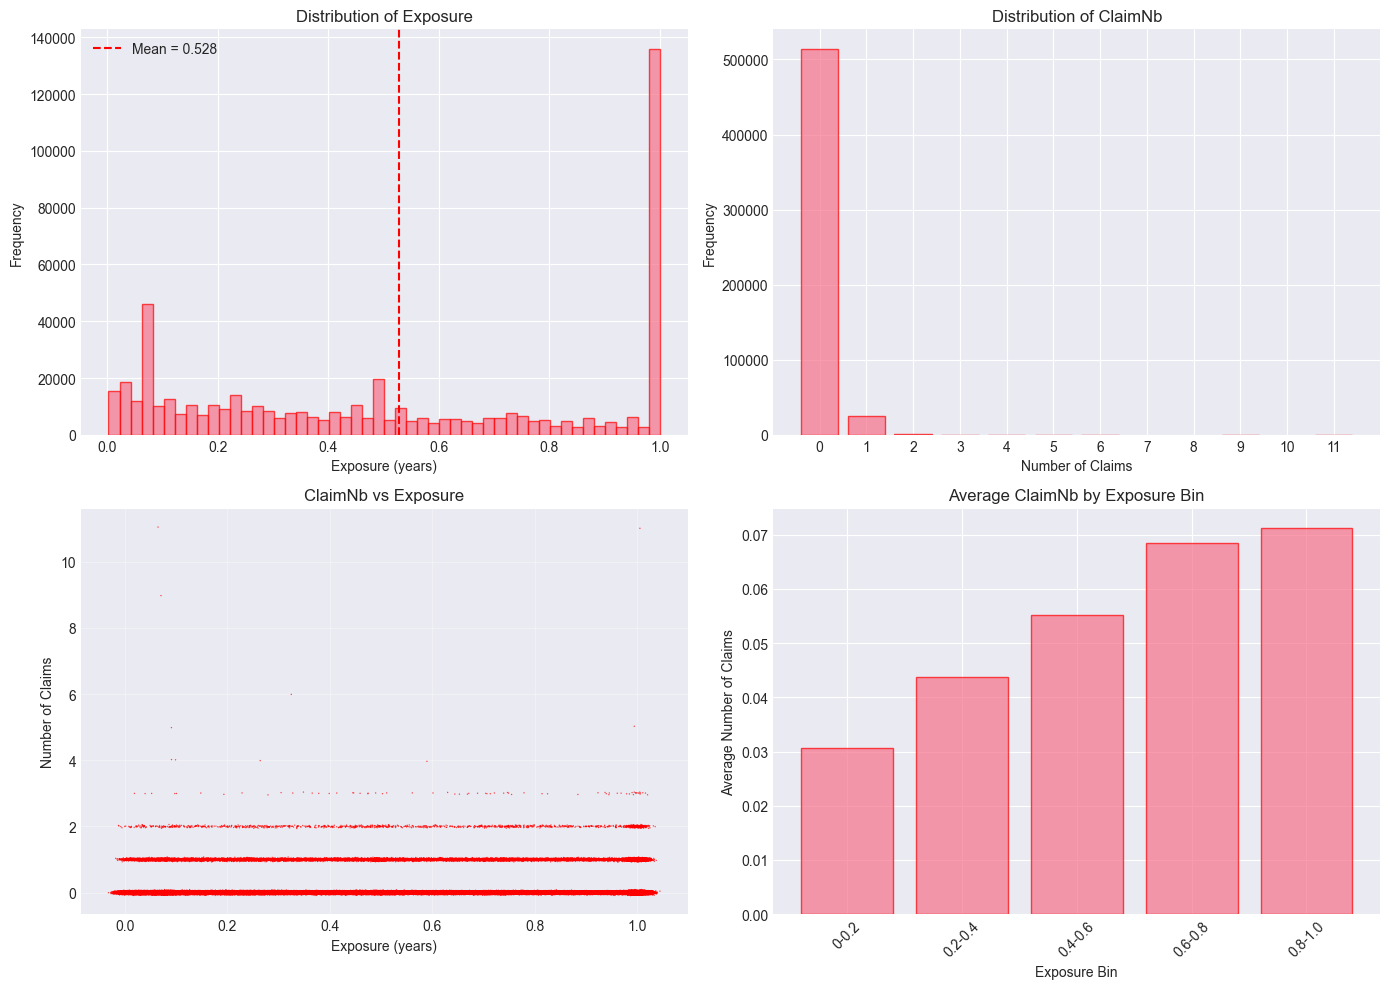

In [12]:
# Visualize Exposure and ClaimNb relationship
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram of Exposure
axes[0, 0].hist(df_train[EXPOSURE_COL], bins=50, edgecolor='red', alpha=0.7)
axes[0, 0].set_xlabel('Exposure (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Exposure')
axes[0, 0].axvline(df_train[EXPOSURE_COL].mean(), color='red', linestyle='--', 
                   label=f'Mean = {df_train[EXPOSURE_COL].mean():.3f}')
axes[0, 0].legend()

# 2. Histogram of ClaimNb
claim_counts = df_train[CLAIM_NB_COL].value_counts().sort_index()
axes[0, 1].bar(claim_counts.index, claim_counts.values, edgecolor='red', alpha=0.7)
axes[0, 1].set_xlabel('Number of Claims')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of ClaimNb')
axes[0, 1].set_xticks(range(0, int(df_train[CLAIM_NB_COL].max()) + 1))

# 3. Scatter plot (ClaimNb vs Exposure)
# Add jitter for better visualization
jitter_x = np.random.normal(0, 0.01, size=len(df_train))
jitter_y = np.random.normal(0, 0.02, size=len(df_train))
axes[1, 0].scatter(df_train[EXPOSURE_COL] + jitter_x, 
                   df_train[CLAIM_NB_COL] + jitter_y, 
                   alpha=0.7, s=1, color='red', edgecolors='none')
axes[1, 0].set_xlabel('Exposure (years)')
axes[1, 0].set_ylabel('Number of Claims')
axes[1, 0].set_title('ClaimNb vs Exposure')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar plot (average ClaimNb by Exposure bin)
# Create exposure bins
exposure_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df_train['exposure_bin'] = pd.cut(df_train[EXPOSURE_COL], bins=exposure_bins, labels=bin_labels)

# Calculate average ClaimNb per bin
avg_claims_by_bin = df_train.groupby('exposure_bin', observed=True)[CLAIM_NB_COL].mean()
axes[1, 1].bar(range(len(avg_claims_by_bin)), avg_claims_by_bin.values, 
               edgecolor='red', alpha=0.7)
axes[1, 1].set_xlabel('Exposure Bin')
axes[1, 1].set_ylabel('Average Number of Claims')
axes[1, 1].set_title('Average ClaimNb by Exposure Bin')
axes[1, 1].set_xticks(range(len(avg_claims_by_bin)))
axes[1, 1].set_xticklabels(bin_labels, rotation=45)

# Remove temporary column
df_train.drop('exposure_bin', axis=1, inplace=True)

plt.tight_layout()
plt.show()


In [13]:
# Create target variable: ClaimFrequency = ClaimNb / Exposure
df_train[TARGET_COL] = df_train[CLAIM_NB_COL] / df_train[EXPOSURE_COL]

print("Claim Frequency Analysis (ClaimNb/Exposure):")
print(df_train[TARGET_COL].describe())
print(f"\nClaim Frequency range: [{df_train[TARGET_COL].min():.4f}, {df_train[TARGET_COL].max():.4f}]")
print(f"Policies with claims (Frequency > 0): {(df_train[TARGET_COL] > 0).sum():,} ({(df_train[TARGET_COL] > 0).mean()*100:.2f}%)")
print(f"Policies with no claims (Frequency = 0): {(df_train[TARGET_COL] == 0).sum():,} ({(df_train[TARGET_COL] == 0).mean()*100:.2f}%)")

print(f"\nTarget variable '{TARGET_COL}' created successfully")

Claim Frequency Analysis (ClaimNb/Exposure):
count    541416.000000
mean          0.261601
std           4.432165
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         732.000000
Name: ClaimFrequency, dtype: float64

Claim Frequency range: [0.0000, 732.0000]
Policies with claims (Frequency > 0): 27,170 (5.02%)
Policies with no claims (Frequency = 0): 514,246 (94.98%)

Target variable 'ClaimFrequency' created successfully


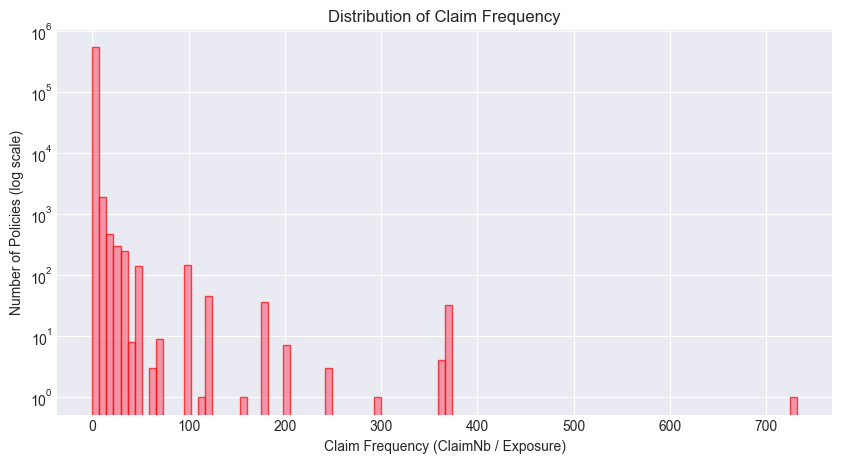

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df_train[TARGET_COL], bins=100, edgecolor='red', alpha=0.7)
plt.yscale('log')
plt.xlabel('Claim Frequency (ClaimNb / Exposure)')
plt.ylabel('Number of Policies (log scale)')
plt.title('Distribution of Claim Frequency')
plt.show()


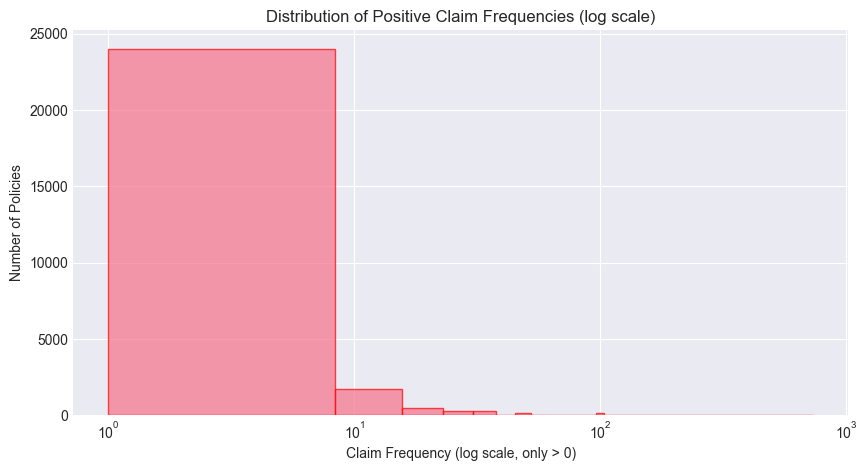

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(df_train.loc[df_train[TARGET_COL] > 0, TARGET_COL],
         bins=100, edgecolor='red', alpha=0.7)
plt.xscale('log')
plt.xlabel('Claim Frequency (log scale, only > 0)')
plt.ylabel('Number of Policies')
plt.title('Distribution of Positive Claim Frequencies (log scale)')
plt.show()



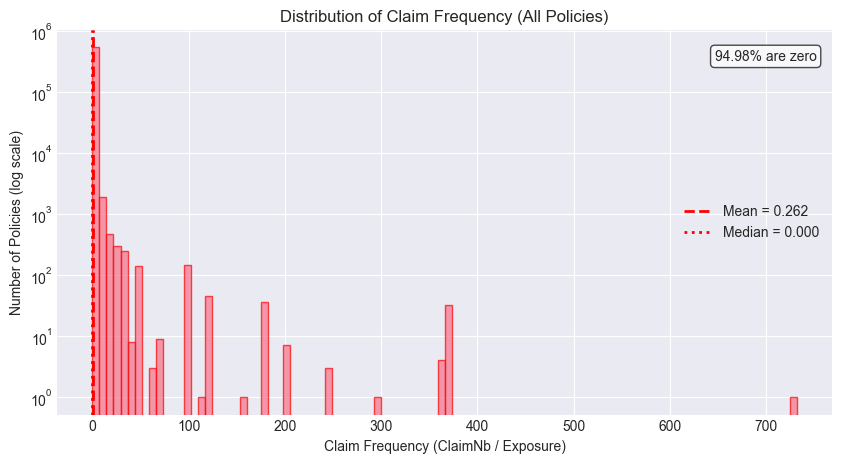

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df_train[TARGET_COL], bins=100, edgecolor='red', alpha=0.7)
mean_cf = df_train[TARGET_COL].mean()
median_cf = df_train[TARGET_COL].median()
plt.axvline(mean_cf, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_cf:.3f}')
plt.axvline(median_cf, color='red', linestyle=':',  linewidth=2, label=f'Median = {median_cf:.3f}')
plt.yscale('log')
zero_pct = (df_train[TARGET_COL] == 0).mean()*100
plt.text(0.98, 0.92, f'{zero_pct:.2f}% are zero',
         transform=plt.gca().transAxes, ha='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.xlabel('Claim Frequency (ClaimNb / Exposure)')
plt.ylabel('Number of Policies (log scale)')
plt.title('Distribution of Claim Frequency (All Policies)')
plt.legend()
plt.show()


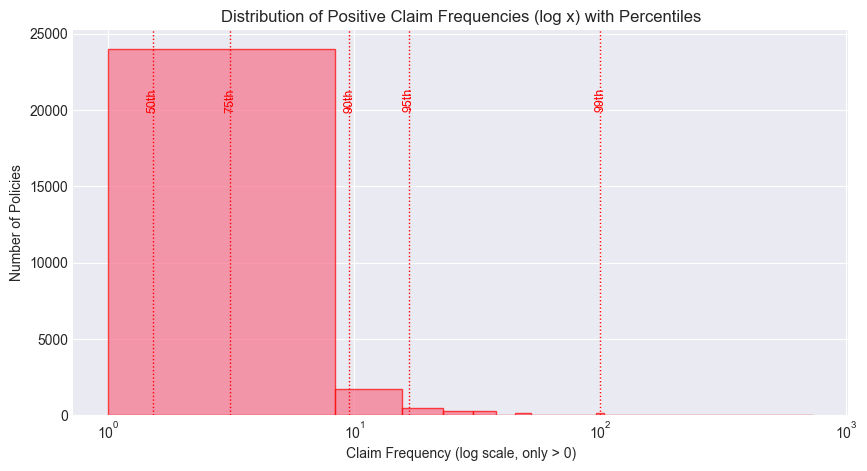

In [17]:
nonzero = df_train.loc[df_train[TARGET_COL] > 0, TARGET_COL]

plt.figure(figsize=(10, 5))
plt.hist(nonzero, bins=100, edgecolor='red', alpha=0.7)
plt.xscale('log')
# percentiles to mark
for p in (50, 75, 90, 95, 99):
    v = np.percentile(nonzero, p)
    plt.axvline(v, color='red', linestyle=':', linewidth=1)
    plt.text(v, plt.gca().get_ylim()[1]*0.85, f'{p}th', rotation=90,
             va='top', ha='center', fontsize=9, color='red')
plt.xlabel('Claim Frequency (log scale, only > 0)')
plt.ylabel('Number of Policies')
plt.title('Distribution of Positive Claim Frequencies (log x) with Percentiles')
plt.show()



In [18]:
# Numerical Features Validation

# Define numerical features to check
numerical_cols = NUMERICAL_FEATURES + [TARGET_COL]

# Check each numerical feature
for col in numerical_cols:
    print()
    print(f"Feature: {col}")
    
    # Basic statistics
    print(f"\nStatistics:")
    stats = df_train[col].describe()
    print(stats)
    
    # Check for specific issues
    print(f"\nData Quality Checks:")
    print(f"  {'Missing values:':<25} {df_train[col].isnull().sum():>10,}")
    print(f"  {'Negative values:':<25} {(df_train[col] < 0).sum():>10,}")
    print(f"  {'Zero values:':<25} {(df_train[col] == 0).sum():>10,} ({(df_train[col] == 0).mean()*100:.2f}%)")
    
    # Min/Max values
    print(f"\nRange:")
    print(f"  {'Minimum:':<25} {df_train[col].min():>10}")
    print(f"  {'Maximum:':<25} {df_train[col].max():>10}")
    
    # Check for potential outliers (values beyond 3 std from mean)
    mean_val = df_train[col].mean()
    std_val = df_train[col].std()
    outliers = ((df_train[col] < mean_val - 3*std_val) | 
                (df_train[col] > mean_val + 3*std_val)).sum()
    print(f"\nPotential outliers (>3σ from mean):")
    print(f"  {'Count:':<25} {outliers:>10,} ({outliers/len(df_train)*100:.2f}%)")


Feature: VehPower

Statistics:
count    541416.000000
mean          6.452726
std           2.050219
min           4.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          15.000000
Name: VehPower, dtype: float64

Data Quality Checks:
  Missing values:                    0
  Negative values:                   0
  Zero values:                       0 (0.00%)

Range:
  Minimum:                           4
  Maximum:                          15

Potential outliers (>3σ from mean):
  Count:                         6,785 (1.25%)

Feature: VehAge

Statistics:
count    541416.000000
mean          7.043473
std           5.659153
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max         100.000000
Name: VehAge, dtype: float64

Data Quality Checks:
  Missing values:                    0
  Negative values:                   0
  Zero values:                  45,923 (8.48%)

Range:
  Minimum:                           0

In [19]:
# Investigate Age = 100 Cases

# VehAge = 100 investigation
print()
print("VehAge = 100 Analysis")


vehage_100 = df_train['VehAge'] == 100
vehage_near_100 = df_train['VehAge'] >= 20 

print(f"\nExact matches:")
print(f"  VehAge = 100:              {vehage_100.sum():>10,} ({vehage_100.mean()*100:.4f}%)")
print(f"  VehAge >= 20:              {vehage_near_100.sum():>10,} ({vehage_near_100.mean()*100:.4f}%)")

# Distribution of high VehAge values
print(f"\nDistribution of VehAge >= 20 years:")
print()
high_vehage = df_train[df_train['VehAge'] >= 20]['VehAge'].value_counts().sort_index()
print(high_vehage)

# DrivAge = 100 investigation
print()
print("DrivAge = 100 Analysis")


drivage_100 = df_train['DrivAge'] == 100
drivage_near_100 = df_train['DrivAge'] >= 80

print(f"\nExact matches:")
print(f"  DrivAge = 100:             {drivage_100.sum():>10,} ({drivage_100.mean()*100:.4f}%)")
print(f"  DrivAge >= 80:             {drivage_near_100.sum():>10,} ({drivage_near_100.mean()*100:.4f}%)")

# Distribution of high DrivAge values
print(f"\nDistribution of DrivAge >= 80 years:")
print()
high_drivage = df_train[df_train['DrivAge'] >= 80]['DrivAge'].value_counts().sort_index()
print(high_drivage)

# Check overlap: policies with BOTH ages = 100
both_100 = vehage_100 & drivage_100
print()
print(f"Policies with BOTH VehAge=100 AND DrivAge=100: {both_100.sum():>10,}")

# Statistical context
print()
print("Age Percentiles")
print("\nVehAge percentiles:")
for p in [90, 95, 99, 99.5, 99.9, 100]:
    val = df_train['VehAge'].quantile(p/100)
    print(f"  {p:>5.1f}th percentile: {val:>6.0f} years")

print("\nDrivAge percentiles:")
for p in [90, 95, 99, 99.5, 99.9, 100]:
    val = df_train['DrivAge'].quantile(p/100)
    print(f"  {p:>5.1f}th percentile: {val:>6.0f} years")


VehAge = 100 Analysis

Exact matches:
  VehAge = 100:                      19 (0.0035%)
  VehAge >= 20:                   9,233 (1.7053%)

Distribution of VehAge >= 20 years:

VehAge
20     2657
21     1765
22     1126
23      719
24      521
25      402
26      277
27      250
28      231
29      218
30      191
31      179
32      124
33       89
34       79
35       73
36       57
37       33
38       30
39       18
40       14
41        7
42        7
43        9
44       13
45       10
46       16
47       11
48       14
49       10
50        6
51        4
52        6
53        2
54        2
55        1
59        1
62        1
64        1
65        1
66        2
68        1
69        2
70        2
71        1
76        1
78        1
79        1
80        3
81        2
82        1
83        2
84        1
85        1
99       18
100      19
Name: count, dtype: int64

DrivAge = 100 Analysis

Exact matches:
  DrivAge = 100:                      2 (0.0004%)
  DrivAge >= 80:            

In [20]:
# Categorical Features Validation

for col in CATEGORICAL_FEATURES:
    print()
    print(f"Feature: {col}")
    
    
    print(f"\nBasic Information:")
    print(f"  {'Data type:':<25} {df_train[col].dtype}")
    print(f"  {'Missing values:':<25} {df_train[col].isnull().sum():>10,} ({df_train[col].isnull().mean()*100:.2f}%)")
    print(f"  {'Unique categories:':<25} {df_train[col].nunique():>10,}")
    
    # Value counts
    print(f"\nCategory Distribution:")
    value_counts = df_train[col].value_counts()
    print(f"  {'Most common:':<25} {value_counts.index[0]:<15} ({value_counts.iloc[0]:>8,} = {value_counts.iloc[0]/len(df_train)*100:>5.2f}%)")
    print(f"  {'Least common:':<25} {value_counts.index[-1]:<15} ({value_counts.iloc[-1]:>8,} = {value_counts.iloc[-1]/len(df_train)*100:>5.2f}%)")
    
    # Show all categories if not too many
    n_unique = df_train[col].nunique()
    if n_unique <= 20:
        print(f"\nAll categories (sorted by frequency):")
        for cat, count in value_counts.items():
            pct = count/len(df_train)*100
            print(f"  {str(cat):<20} {count:>8,} ({pct:>5.2f}%)")
    else:
        print(f"\nTop 10 categories:")
        for cat, count in value_counts.head(10).items():
            pct = count/len(df_train)*100
            print(f"  {str(cat):<20} {count:>8,} ({pct:>5.2f}%)")
        print(f"  ...")
        print(f"\nBottom 5 categories:")
        for cat, count in value_counts.tail(5).items():
            pct = count/len(df_train)*100
            print(f"  {str(cat):<20} {count:>8,} ({pct:>5.2f}%)")
    
    # Check for rare categories (< 0.1% of data)
    rare_threshold = len(df_train) * 0.001  # 0.1%
    rare_cats = value_counts[value_counts < rare_threshold]
    if len(rare_cats) > 0:
        print(f"\n  Rare categories (< 0.1% of data): {len(rare_cats)}")
        print(f"  Total samples in rare categories: {rare_cats.sum():,} ({rare_cats.sum()/len(df_train)*100:.2f}%)")



Feature: Area

Basic Information:
  Data type:                object
  Missing values:                    0 (0.00%)
  Unique categories:                 6

Category Distribution:
  Most common:              C               ( 152,993 = 28.26%)
  Least common:             F               (  14,389 =  2.66%)

All categories (sorted by frequency):
  C                     152,993 (28.26%)
  D                     121,001 (22.35%)
  E                     109,630 (20.25%)
  A                      83,062 (15.34%)
  B                      60,341 (11.15%)
  F                      14,389 ( 2.66%)

Feature: VehBrand

Basic Information:
  Data type:                object
  Missing values:                    0 (0.00%)
  Unique categories:                11

Category Distribution:
  Most common:              B12             ( 132,779 = 24.52%)
  Least common:             B14             (   3,227 =  0.60%)

All categories (sorted by frequency):
  B12                   132,779 (24.52%)
  B1           

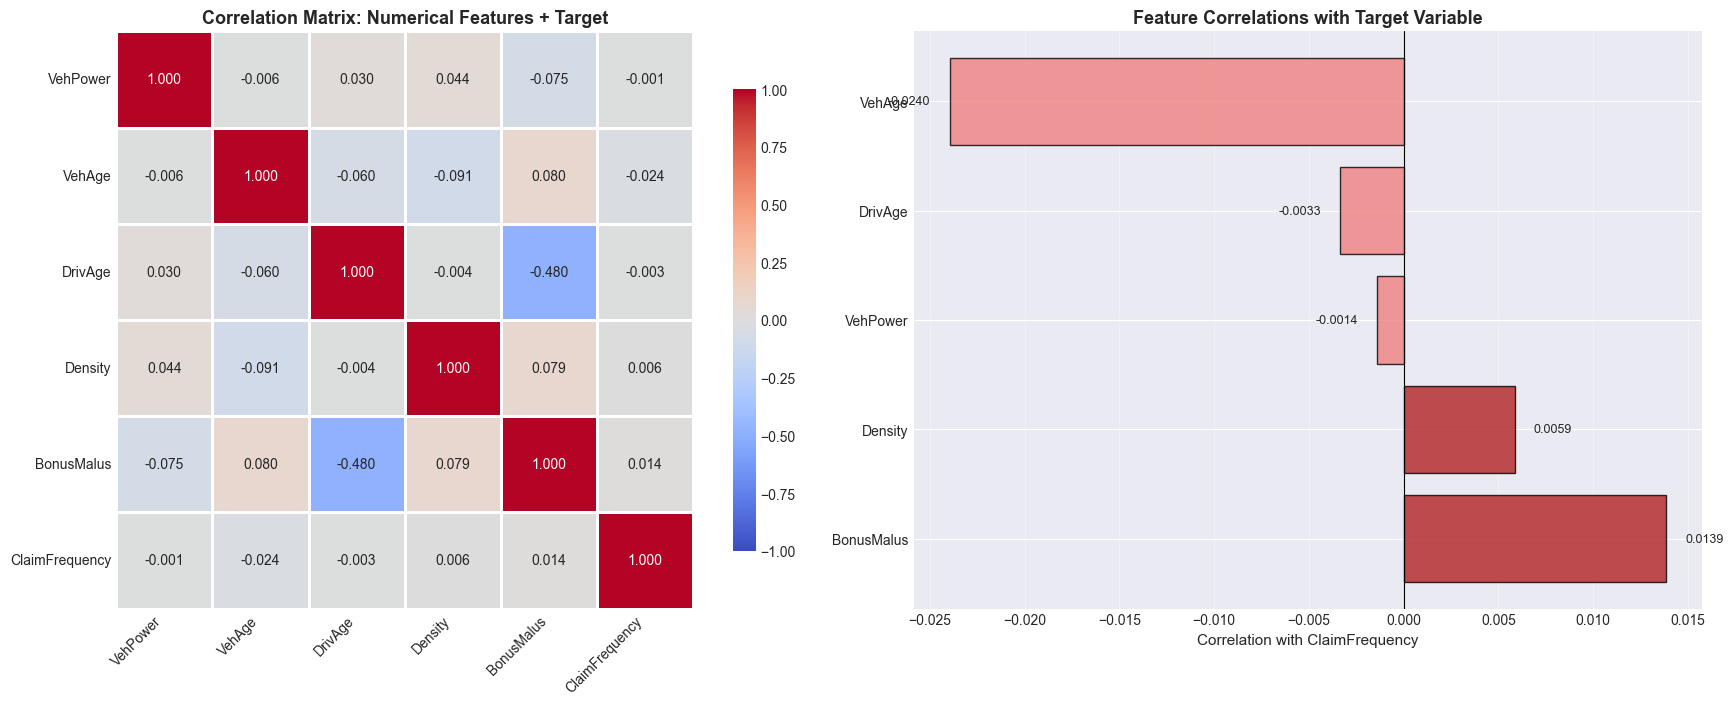

Correlation analysis

Key Observations:

Strongest positive correlation: BonusMalus (0.0139)
Strongest negative correlation: VehAge (-0.0240)

Highly correlated feature pairs (|r| > 0.5):
  (none found)


In [21]:
# Correlation Matrix for Numerical Features

# Ensure target variable exists
if TARGET_COL not in df_train.columns:
    df_train[TARGET_COL] = df_train[CLAIM_NB_COL] / df_train[EXPOSURE_COL]

# prepare numerical features including target (avoid duplicates)
numerical_features_with_target = list(dict.fromkeys(NUMERICAL_FEATURES + [TARGET_COL]))

# compute correlation matrix
correlation_matrix = df_train[numerical_features_with_target].corr()

# create figure
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1) full correlation heatmap
ax1 = axes[0]
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax1,
    vmin=-1,
    vmax=1
)
ax1.set_title('Correlation Matrix: Numerical Features + Target', fontsize=13, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)


# 2) correlation with target (bar plot)
ax2 = axes[1]
target_correlations = (
    correlation_matrix[TARGET_COL]
    .drop(TARGET_COL)
    .sort_values(ascending=False)
)

# bar colors: consistent red theme
bar_colors = [
    "#B22222" if val > 0 else "#F08080"  # brick red (positive), light red (negative)
    for val in target_correlations.values
]

ax2.barh(
    target_correlations.index,
    target_correlations.values,
    color=bar_colors,
    alpha=0.8,
    edgecolor='black'
)
ax2.set_xlabel(f'Correlation with {TARGET_COL}', fontsize=11)
ax2.set_title('Feature Correlations with Target Variable', fontsize=13, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3, axis='x')

# add value labels
for i, (feature, value) in enumerate(target_correlations.items()):
    # small offset left/right depending on sign
    offset = 0.001 if value > 0 else -0.001
    ax2.text(
        value + offset,
        i,
        f'{value:.4f}',
        va='center',
        ha='left' if value > 0 else 'right',
        fontsize=9
    )

plt.tight_layout()

# dynamic filename
output_corr_fig = FIGURES_DIR / "numerical_feature_correlations.png"
plt.savefig(output_corr_fig, dpi=300, bbox_inches='tight')
plt.show()

print("Correlation analysis")
print("\nKey Observations:")

# strongest +/- correlations with target
if len(target_correlations) > 0:
    print(f"\nStrongest positive correlation: {target_correlations.index[0]} ({target_correlations.values[0]:.4f})")
    print(f"Strongest negative correlation: {target_correlations.index[-1]} ({target_correlations.values[-1]:.4f})")
else:
    print("No numerical features (other than target) to correlate with.")

# highly correlated feature pairs (exclude target)
print("\nHighly correlated feature pairs (|r| > 0.5):")
feature_only_corr = (
    correlation_matrix
    .drop(TARGET_COL, axis=0)
    .drop(TARGET_COL, axis=1)
)

found_any = False
for i in range(len(feature_only_corr.columns)):
    for j in range(i + 1, len(feature_only_corr.columns)):
        corr_value = feature_only_corr.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"  {feature_only_corr.columns[i]} ↔ {feature_only_corr.columns[j]}: {corr_value:.4f}")
            found_any = True

if not found_any:
    print("  (none found)")


In [22]:
from scipy import stats

# p < 0.05: The feature significantly affects ClaimFrequency

print("ANOVA significance tests (ClaimFrequency - Categorical Feature)\n")

for col in CATEGORICAL_FEATURES:
    groups = [df_train.loc[df_train[col] == cat, TARGET_COL] for cat in df_train[col].unique()]
    if len(groups) > 1:
        F, p = stats.f_oneway(*groups)
        print(f"{col:<15}: ANOVA p-value = {p:.4e}")
    else:
        print(f"{col:<15}: Only one category (skipped)")

ANOVA significance tests (ClaimFrequency - Categorical Feature)

Area           : ANOVA p-value = 7.5075e-06
VehBrand       : ANOVA p-value = 1.4028e-87
VehGas         : ANOVA p-value = 3.6880e-16
Region         : ANOVA p-value = 2.8839e-15


In [23]:
# Categorical Feature Analysis

# Ensure target variable exists
if TARGET_COL not in df_train.columns:
    df_train[TARGET_COL] = df_train[CLAIM_NB_COL] / df_train[EXPOSURE_COL]

print("CATEGORICAL FEATURES vs CLAIM FREQUENCY")

overall_mean = df_train[TARGET_COL].mean()
overall_var = df_train[TARGET_COL].var()

print(f"\nOverall Mean {TARGET_COL}: {overall_mean:.4f} claims/year")
print()

for col in CATEGORICAL_FEATURES:
    print()
    print(f"Feature: {col}")
    
    # groupby stats
    category_stats = (
        df_train
        .groupby(col, dropna=False)[TARGET_COL]
        .agg([
            ('Count', 'count'),
            ('Mean', 'mean'),
            ('Std', 'std'),
            ('Median', 'median'),
        ])
        .reset_index()
    )

    # percentage of total rows
    category_stats['Pct_Total'] = category_stats['Count'] / len(df_train) * 100

    # sort by mean descending
    category_stats = category_stats.sort_values('Mean', ascending=False, ignore_index=True)

    # header
    print(f"\n{'Category':<20} {'Count':>10} {'%':>7} {'Mean':>10} {'Std':>10} {'Median':>10} {'vs Overall':>14}")
    print("-" * 80)

    for _, row in category_stats.iterrows():
        diff_from_overall = row['Mean'] - overall_mean
        diff_pct = (diff_from_overall / overall_mean) * 100 if overall_mean > 0 else 0
        marker = "↑" if diff_from_overall > 0 else "↓" if diff_from_overall < 0 else "="

        print(
            f"{str(row[col]):<20} "
            f"{row['Count']:>10,} "
            f"{row['Pct_Total']:>6.2f}% "
            f"{row['Mean']:>10.4f} "
            f"{row['Std']:>10.4f} "
            f"{row['Median']:>10.4f} "
            f"{marker} {diff_pct:>+6.1f}%"
        )

    # between-category variance (ANOVA-style decomposition)
    grand_mean = overall_mean
    between_var = 0.0
    for _, row in category_stats.iterrows():
        n = row['Count']
        cat_mean = row['Mean']
        between_var += n * (cat_mean - grand_mean) ** 2
    between_var /= len(df_train)

    total_var = overall_var
    var_ratio = (between_var / total_var) * 100 if total_var > 0 else 0.0

    print(f"\n{'Between-category variance:':<40} {between_var:>10.4f}")
    print(f"{'Total variance:':<40} {total_var:>10.4f}")
    print(f"{'Variance explained by categories:':<40} {var_ratio:>9.2f}%")

    # highest vs lowest risk categories
    # (guard for zero or 1-level categorical)
    if len(category_stats) > 1:
        highest = category_stats.iloc[0]
        lowest = category_stats.iloc[-1]
        risk_ratio = (
            highest['Mean'] / lowest['Mean']
            if lowest['Mean'] > 0
            else float('inf')
        )

        print(f"\n{'Highest risk:':<20} {highest[col]} (mean = {highest['Mean']:.4f})")
        print(f"{'Lowest risk:':<20} {lowest[col]} (mean = {lowest['Mean']:.4f})")
        print(f"{'Risk ratio:':<20} {risk_ratio:.2f}x")
    else:
        print("\nOnly one category present — cannot compute risk ratio.")


CATEGORICAL FEATURES vs CLAIM FREQUENCY

Overall Mean ClaimFrequency: 0.2616 claims/year


Feature: Area

Category                  Count       %       Mean        Std     Median     vs Overall
--------------------------------------------------------------------------------
F                        14,389   2.66%     0.3884     4.5557     0.0000 ↑  +48.5%
E                       109,630  20.25%     0.2951     4.7375     0.0000 ↑  +12.8%
D                       121,001  22.35%     0.2786     4.4161     0.0000 ↑   +6.5%
B                        60,341  11.15%     0.2461     4.3717     0.0000 ↓   -5.9%
C                       152,993  28.26%     0.2417     4.0803     0.0000 ↓   -7.6%
A                        83,062  15.34%     0.2185     4.6755     0.0000 ↓  -16.5%

Between-category variance:                   0.0011
Total variance:                             19.6441
Variance explained by categories:             0.01%

Highest risk:        F (mean = 0.3884)
Lowest risk:         A (mean =

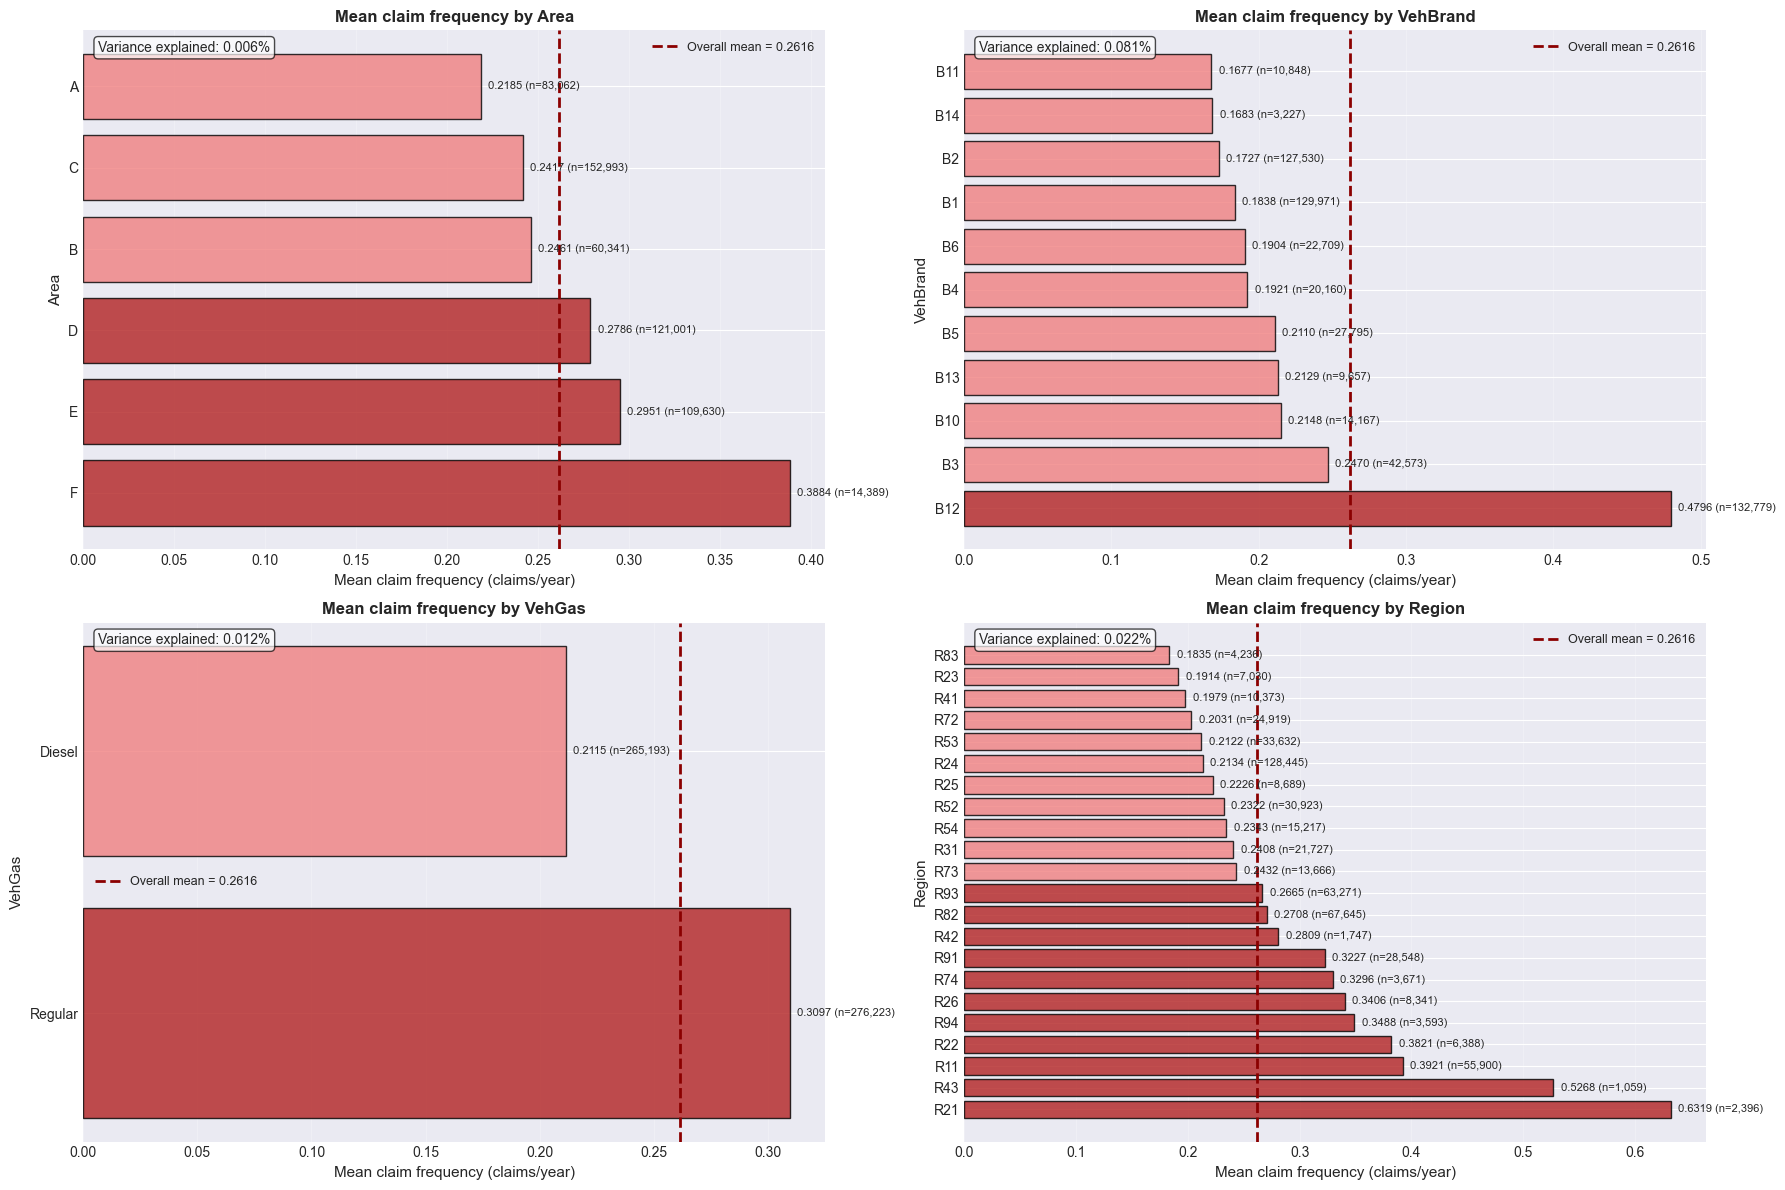

Categorical feature visualization saved to /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/categorical_features_vs_target.png


In [24]:
# Visualize Categorical Feature Effects

# Ensure target variable exists
if TARGET_COL not in df_train.columns:
    df_train[TARGET_COL] = df_train[CLAIM_NB_COL] / df_train[EXPOSURE_COL]

n_cat = len(CATEGORICAL_FEATURES)

n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

overall_mean = df_train[TARGET_COL].mean()

color_above = "#B22222"     # brick red for above overall mean
color_below = "#F08080"     # light red for below overall mean
mean_line_color = "#8B0000" # dark red for mean line

for idx, col in enumerate(CATEGORICAL_FEATURES):
    if idx >= len(axes):
        break

    ax = axes[idx]

    # per-category stats
    category_means = (
        df_train
        .groupby(col, dropna=False)[TARGET_COL]
        .agg(['mean', 'count'])
        .reset_index()
        .sort_values('mean', ascending=False)
    )

    # choose bar colors based on whether above/below overall
    bar_colors = [
        color_above if m > overall_mean else color_below
        for m in category_means['mean']
    ]

    bars = ax.barh(
        category_means[col].astype(str),
        category_means['mean'],
        color=bar_colors,
        alpha=0.8,
        edgecolor='black',
        linewidth=1
    )

    # overall mean line
    ax.axvline(
        overall_mean,
        color=mean_line_color,
        linestyle='--',
        linewidth=2,
        label=f'Overall mean = {overall_mean:.4f}'
    )

    ax.set_xlabel('Mean claim frequency (claims/year)', fontsize=11)
    ax.set_ylabel(col, fontsize=11)
    ax.set_title(f'Mean claim frequency by {col}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.25, axis='x')

    # add labels on bars
    ax_lim = ax.get_xlim()
    x_range = ax_lim[1] - ax_lim[0]
    offset = x_range * 0.01

    for bar, mean_val, count_val in zip(bars, category_means['mean'], category_means['count']):
        width = bar.get_width()
        ax.text(
            width + offset,
            bar.get_y() + bar.get_height() / 2,
            f'{mean_val:.4f} (n={count_val:,})',
            va='center',
            fontsize=8
        )

    # variance explained
    grand_mean = overall_mean
    between_var = (
        sum(
            row['count'] * (row['mean'] - grand_mean) ** 2
            for _, row in category_means.iterrows()
        ) / len(df_train)
    )
    total_var = df_train[TARGET_COL].var()
    var_explained = (between_var / total_var * 100) if total_var > 0 else 0.0

    ax.text(
        0.02,
        0.98,
        f'Variance explained: {var_explained:.3f}%',
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )

# if we have fewer categorical features than subplots, hide the extra axes
for extra_ax in axes[n_cat:]:
    extra_ax.set_visible(False)

plt.tight_layout()

output_path = FIGURES_DIR / "categorical_features_vs_target.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Categorical feature visualization saved to {output_path}")


In [25]:
# Feature Scaling (Numerical Features Only)

from sklearn.preprocessing import StandardScaler

print("FEATURE SCALING (StandardScaler)")

# Configuration
SCALER_TYPE = StandardScaler
SCALED_SUFFIX = "_scaled"

# Features to scale (numerical only)
features_to_scale = NUMERICAL_FEATURES.copy()
print(f"\nFeatures to scale: {features_to_scale}")
print(f"Number of features: {len(features_to_scale)}")

# Check original scales
print("\nOriginal scales (before scaling):")
print()
for col in features_to_scale:
    print(f"{col:<15} Min: {df_train[col].min():>10.2f}  "
          f"Max: {df_train[col].max():>10.2f}  "
          f"Mean: {df_train[col].mean():>10.2f}  "
          f"Std: {df_train[col].std():>10.2f}")

# Initialize and fit scaler
scaler = SCALER_TYPE()
X_train_scaled = scaler.fit_transform(df_train[features_to_scale])

# Create scaled DataFrame
df_train_scaled = df_train.copy()
for idx, col in enumerate(features_to_scale):
    df_train_scaled[col + SCALED_SUFFIX] = X_train_scaled[:, idx]

# Check scaled features
print("\nScaled features (after StandardScaler):")
print()
for col in features_to_scale:
    scaled_col = col + SCALED_SUFFIX
    print(f"{scaled_col:<22} Min: {df_train_scaled[scaled_col].min():>10.2f}  "
          f"Max: {df_train_scaled[scaled_col].max():>10.2f}  "
          f"Mean: {df_train_scaled[scaled_col].mean():>10.2f}  "
          f"Std: {df_train_scaled[scaled_col].std():>10.2f}")


print(f"\nOriginal features preserved in df_train")
print(f"Scaled features available in df_train_scaled (suffix '{SCALED_SUFFIX}')")



FEATURE SCALING (StandardScaler)

Features to scale: ['VehPower', 'VehAge', 'DrivAge', 'Density', 'BonusMalus']
Number of features: 5

Original scales (before scaling):

VehPower        Min:       4.00  Max:      15.00  Mean:       6.45  Std:       2.05
VehAge          Min:       0.00  Max:     100.00  Mean:       7.04  Std:       5.66
DrivAge         Min:      18.00  Max:     100.00  Mean:      45.50  Std:      14.14
Density         Min:       1.00  Max:   27000.00  Mean:    1795.93  Std:    3966.46
BonusMalus      Min:      50.00  Max:     230.00  Mean:      59.77  Std:      15.65

Scaled features (after StandardScaler):

VehPower_scaled        Min:      -1.20  Max:       4.17  Mean:      -0.00  Std:       1.00
VehAge_scaled          Min:      -1.24  Max:      16.43  Mean:      -0.00  Std:       1.00
DrivAge_scaled         Min:      -1.95  Max:       3.85  Mean:       0.00  Std:       1.00
Density_scaled         Min:      -0.45  Max:       6.35  Mean:       0.00  Std:       1.00
Bonu

In [26]:
# PCA Visualization 

from sklearn.decomposition import PCA

SCALED_SUFFIX = "_scaled"

# ensure scaled features exist
scaled_cols = [col + SCALED_SUFFIX for col in NUMERICAL_FEATURES]
missing_scaled = [c for c in scaled_cols if c not in df_train_scaled.columns]
if missing_scaled:
    raise ValueError(f"Scaled columns missing: {missing_scaled}. Run feature scaling first.")

# use scaled numerical features
X_for_pca = df_train_scaled[scaled_cols].values

print(f"\nInput features: {len(NUMERICAL_FEATURES)} numerical features (scaled)")
print(f"Number of samples: {len(X_for_pca):,}")

# Scree analysis

print()
print("SCREE ANALYSIS")

pca_full = PCA(n_components=None)
pca_full.fit(X_for_pca)

var_explained_all = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(var_explained_all)

print(f"\nTotal components available: {len(var_explained_all)}")
print(f"\nVariance explained by each component:")
for i, (var, cum_var) in enumerate(zip(var_explained_all, cumulative_var), 1):
    print(f"  PC{i}: {var*100:>6.2f}%  (Cumulative: {cum_var*100:>6.2f}%)")



Input features: 5 numerical features (scaled)
Number of samples: 541,416

SCREE ANALYSIS

Total components available: 5

Variance explained by each component:
  PC1:  30.25%  (Cumulative:  30.25%)
  PC2:  21.99%  (Cumulative:  52.23%)
  PC3:  19.91%  (Cumulative:  72.14%)
  PC4:  17.66%  (Cumulative:  89.80%)
  PC5:  10.20%  (Cumulative: 100.00%)


In [27]:
print(f"\nPC1 + PC2 explain {cumulative_var[1]*100:.2f}% of total variance")


PC1 + PC2 explain 52.23% of total variance


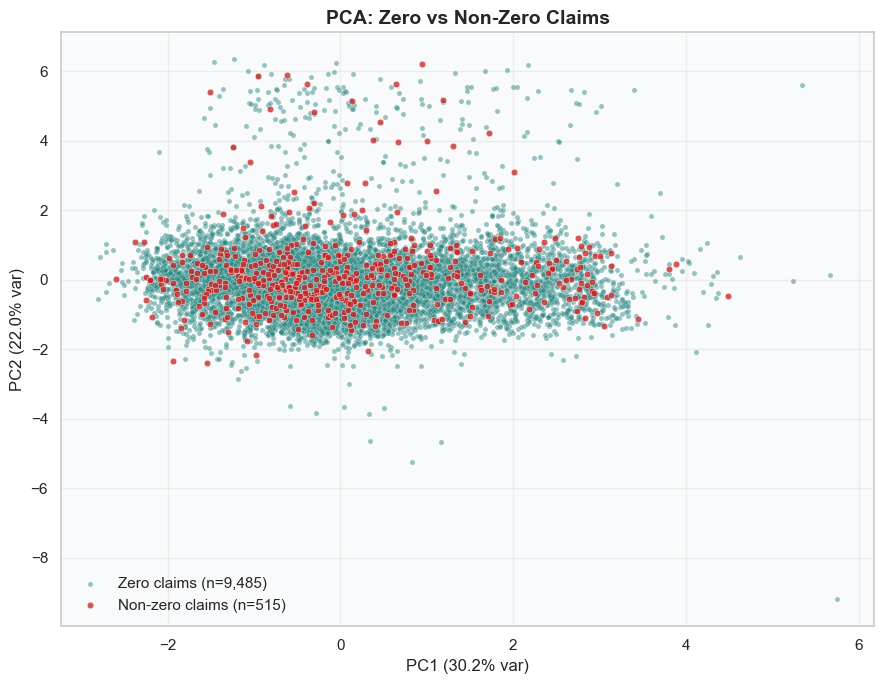

PCA visualization saved to /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/pca_zero_vs_nonzero.png
Sampled 10,000 points from 541,416 total observations


In [28]:
# PCA: Zero vs Non-Zero Claims Visualization

# Transform data to PC space (first 2 components for visualization)
pca_2d = PCA(n_components=2)
X_pca_full = pca_2d.fit_transform(X_for_pca)

# Sample for visualization (to avoid overplotting with 541k points)
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_full))
sample_indices = np.random.choice(len(X_pca_full), size=sample_size, replace=False)

X_pca_sample = X_pca_full[sample_indices]
y_sample = df_train_scaled[TARGET_COL].values[sample_indices]

# Create masks for zero vs non-zero claims
zero_mask = (y_sample == 0)
nonzero_mask = (y_sample > 0)

# Plot
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F9FAFB"})
plt.figure(figsize=(9, 7))

# Colors
color_zero = "#1B7F79"      # Teal for zero claims
color_nonzero = "#C71F1F"   # Red for non-zero claims

# ZERO CLAIMS
sns.scatterplot(
    x=X_pca_sample[zero_mask, 0],
    y=X_pca_sample[zero_mask, 1],
    color=color_zero,
    s=14,
    alpha=0.45,
    label=f"Zero claims (n={zero_mask.sum():,})"
)

# NON-ZERO CLAIMS
sns.scatterplot(
    x=X_pca_sample[nonzero_mask, 0],
    y=X_pca_sample[nonzero_mask, 1],
    color=color_nonzero,
    s=22,
    alpha=0.75,
    label=f"Non-zero claims (n={nonzero_mask.sum():,})"
)

# Get variance explained from the 2D PCA
var_explained_2d = pca_2d.explained_variance_ratio_

plt.xlabel(f'PC1 ({var_explained_2d[0]*100:.1f}% var)', fontsize=12)
plt.ylabel(f'PC2 ({var_explained_2d[1]*100:.1f}% var)', fontsize=12)
plt.title("PCA: Zero vs Non-Zero Claims", fontsize=14, fontweight="bold")
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
output_path = FIGURES_DIR / "pca_zero_vs_nonzero.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"PCA visualization saved to {output_path}")
print(f"Sampled {sample_size:,} points from {len(X_pca_full):,} total observations")


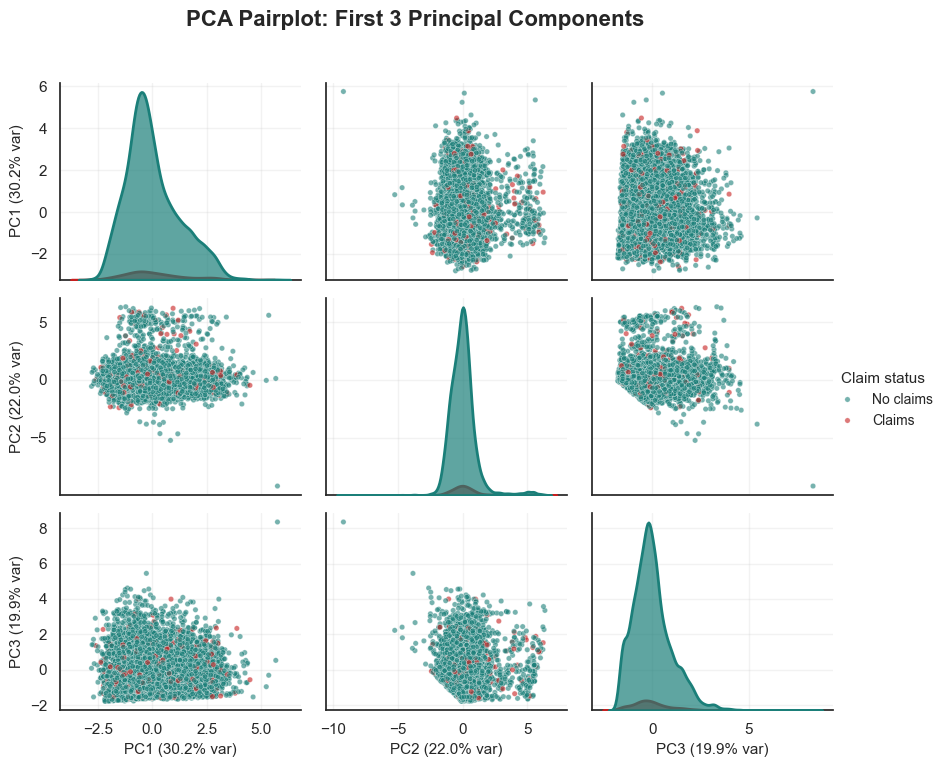

  Sampled 10,000 observations from 541,416 total


In [29]:
# PCA Pairplot: PC1, PC2, PC3 Comparison

# Transform data to PC space (first 3 components)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_for_pca)

# Get variance explained for each component
var_exp_3d = pca_3d.explained_variance_ratio_

# Sample for visualization (pairplot can be slow with too many points)
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_3d))
sample_indices = np.random.choice(len(X_pca_3d), size=sample_size, replace=False)

# Pretty labels with variance
pc1_label = f'PC1 ({var_exp_3d[0]*100:.1f}% var)'
pc2_label = f'PC2 ({var_exp_3d[1]*100:.1f}% var)'
pc3_label = f'PC3 ({var_exp_3d[2]*100:.1f}% var)'

# Create dataframe for pairplot
pca_df = pd.DataFrame({
    pc1_label: X_pca_3d[sample_indices, 0],
    pc2_label: X_pca_3d[sample_indices, 1],
    pc3_label: X_pca_3d[sample_indices, 2],
})

# Get target values using numpy array indexing
pca_df[TARGET_COL] = df_train_scaled[TARGET_COL].values[sample_indices]

# Create binary label for coloring (exact text you want)
pca_df['Claim status'] = np.where(
    pca_df[TARGET_COL] == 0,
    'No claims',
    'Claims'
)

sns.set_theme(style="white")

g = sns.pairplot(
    pca_df,
    vars=[pc1_label, pc2_label, pc3_label],
    hue='Claim status',
    hue_order=['No claims', 'Claims'],
    palette={'No claims': '#1B7F79', 'Claims': '#C71F1F'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 15},
    diag_kws={'alpha': 0.7, 'linewidth': 2},
    corner=False
)

# Title
g.fig.suptitle(
    'PCA Pairplot: First 3 Principal Components',
    y=1.02,
    fontsize=16,
    fontweight='bold'
)

# Grid + nicer axis labels
for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(True, alpha=0.25)
        ax.set_xlabel(ax.get_xlabel(), fontsize=11)
        ax.set_ylabel(ax.get_ylabel(), fontsize=11)

# ----- Fix legend placement & text -----
old_legend = g._legend
handles = old_legend.legend_handles
labels = ['No claims', 'Claims']  # enforce order & wording
old_legend.remove()

g.fig.legend(
    handles,
    labels,
    title='Claim status',
    loc='center right',
    bbox_to_anchor=(1.10, 0.5),
    borderaxespad=0.,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / "pca_pairplot_3components.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"  Sampled {sample_size:,} observations from {len(X_pca_3d):,} total")

# Optional clean up
pca_df.drop('Claim status', axis=1, inplace=True)


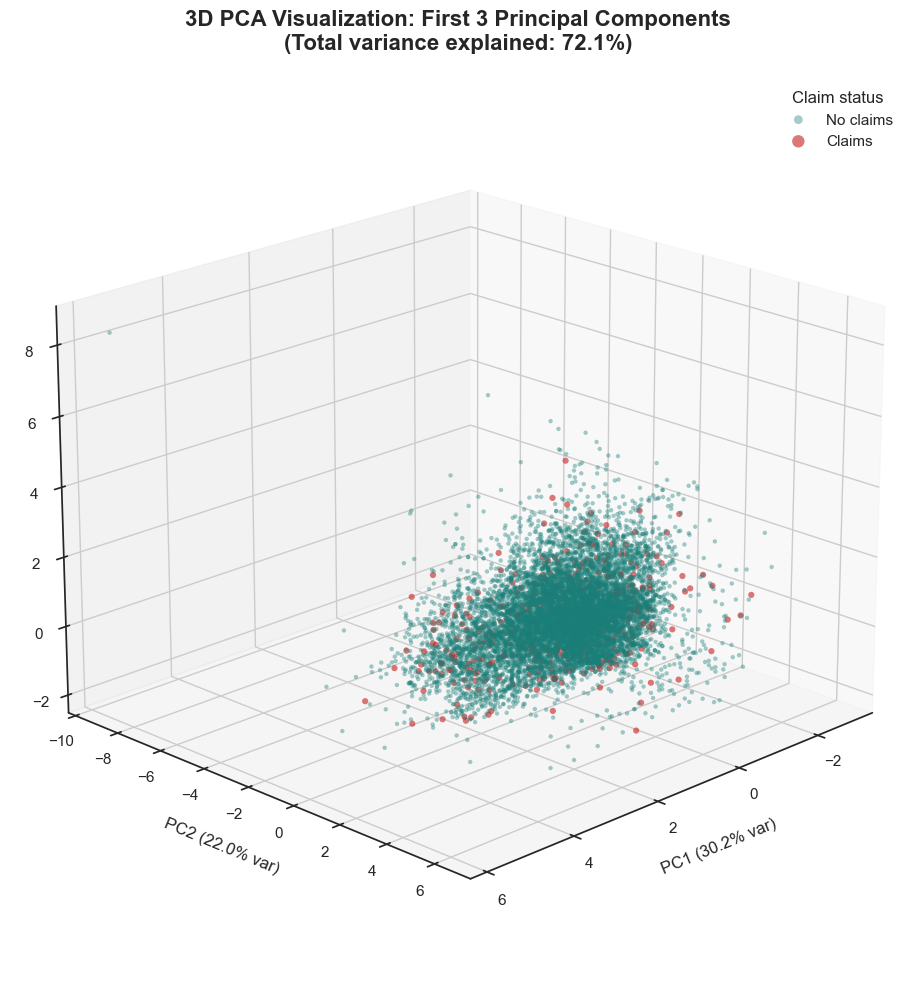

3D PCA Plot:
  Total variance (PC1+PC2+PC3): 72.14%
  Sampled: 10,000 of 541,416 observations
  No claims: 9,485 (94.8%)
  Claims: 515 (5.1%)
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/pca_3d_scatter.png


In [30]:
# 3D PCA Visualization
# 3D scatter plot showing the first 3 principal components
# Uses the same sampled data from the pairplot above

from mpl_toolkits.mplot3d import Axes3D

# Get sampled PCA coordinates
X_pca_sampled = X_pca_3d[sample_indices]

# Get target values for sampled observations
y_sampled = df_train_scaled[TARGET_COL].values[sample_indices]

# Create binary masks for coloring (consistent with pairplot)
no_claims_mask = (y_sampled == 0)
has_claims_mask = ~no_claims_mask

# Create figure with 3D axis
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot no claims (consistent colors with pairplot)
ax.scatter(
    X_pca_sampled[no_claims_mask, 0],
    X_pca_sampled[no_claims_mask, 1],
    X_pca_sampled[no_claims_mask, 2],
    c='#1B7F79',  # Teal (matches pairplot 'No claims' color)
    alpha=0.4,
    s=10,
    label='No claims',
    edgecolors='none'
)

# Plot claims (consistent colors with pairplot)
ax.scatter(
    X_pca_sampled[has_claims_mask, 0],
    X_pca_sampled[has_claims_mask, 1],
    X_pca_sampled[has_claims_mask, 2],
    c='#C71F1F',  # Red (matches pairplot 'Claims' color)
    alpha=0.6,
    s=20,
    label='Claims',
    edgecolors='none'
)

# Axis labels with variance explained
ax.set_xlabel(f'PC1 ({var_exp_3d[0]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_ylabel(f'PC2 ({var_exp_3d[1]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_zlabel(f'PC3 ({var_exp_3d[2]*100:.1f}% var)', fontsize=12, labelpad=10)

# Title
total_var_3d = (var_exp_3d[0] + var_exp_3d[1] + var_exp_3d[2]) * 100
ax.set_title(
    f'3D PCA Visualization: First 3 Principal Components\n(Total variance explained: {total_var_3d:.1f}%)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Legend
ax.legend(
    loc='upper right',
    fontsize=11,
    markerscale=2,
    framealpha=0.9,
    title='Claim status'
)

# Grid styling (consistent with other plots)
ax.grid(True, alpha=0.25)

# Adjust viewing angle for better perspective
ax.view_init(elev=20, azim=45)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / "pca_3d_scatter.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"3D PCA Plot:")
print(f"  Total variance (PC1+PC2+PC3): {total_var_3d:.2f}%")
print(f"  Sampled: {sample_size:,} of {len(X_pca_3d):,} observations")
print(f"  No claims: {no_claims_mask.sum():,} ({no_claims_mask.sum()/sample_size*100:.1f}%)")
print(f"  Claims: {has_claims_mask.sum():,} ({has_claims_mask.sum()/sample_size*100:.1f}%)")
print(f"  Figure saved: {output_path}")


K-MEANS CLUSTERING - ELBOW METHOD

Input features: 5 numerical features (scaled)
Number of samples: 541,416

Testing K values from 2 to 10...
  K= 2  Inertia:    2,138,104.52  Silhouette: 0.2770
  K= 3  Inertia:    1,758,567.10  Silhouette: 0.2907
  K= 4  Inertia:    1,467,876.93  Silhouette: 0.2397
  K= 5  Inertia:    1,236,767.96  Silhouette: 0.2544
  K= 6  Inertia:    1,085,603.80  Silhouette: 0.2368
  K= 7  Inertia:    1,019,957.99  Silhouette: 0.2259
  K= 8  Inertia:      958,799.41  Silhouette: 0.2100
  K= 9  Inertia:      909,560.50  Silhouette: 0.2112
  K=10  Inertia:      868,364.97  Silhouette: 0.2105


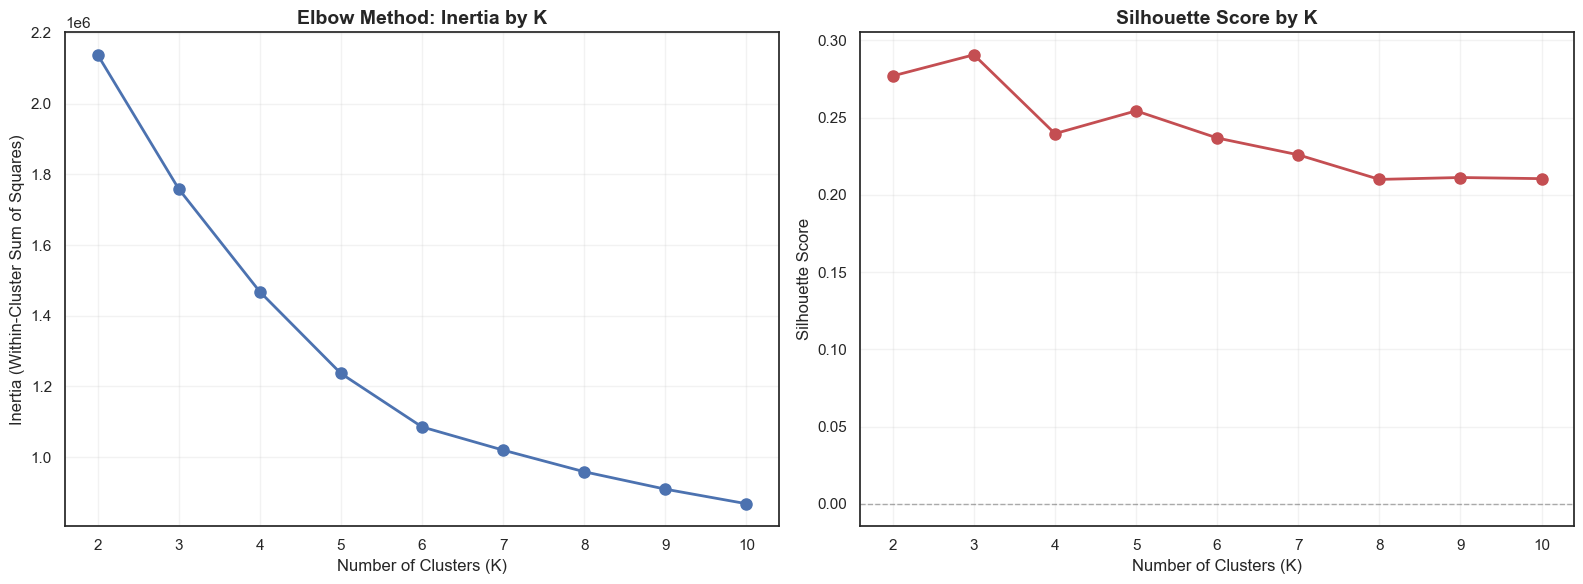


Elbow method visualization:
  Best K can be identified where inertia 'elbow' occurs
  Higher silhouette scores indicate better cluster separation
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/clustering_elbow_method.png


In [31]:
# K-Means Clustering - Elbow Method
# Determine optimal number of clusters using inertia and silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("K-MEANS CLUSTERING - ELBOW METHOD")
print()

# Use scaled features for clustering
X_for_clustering = df_train_scaled[[col + SCALED_SUFFIX for col in NUMERICAL_FEATURES]].values

print(f"Input features: {len(NUMERICAL_FEATURES)} numerical features (scaled)")
print(f"Number of samples: {len(X_for_clustering):,}")

# Test different K values
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print(f"\nTesting K values from {min(k_range)} to {max(k_range)}...")

for k in k_range:
    # Fit K-Means with current k
    kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    kmeans.fit(X_for_clustering)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score on a sample (for computational efficiency)
    np.random.seed(SEED)
    sample_size = min(10000, len(X_for_clustering))
    sample_idx = np.random.choice(len(X_for_clustering), size=sample_size, replace=False)
    silhouette_avg = silhouette_score(
        X_for_clustering[sample_idx], 
        kmeans.labels_[sample_idx]
    )
    silhouette_scores.append(silhouette_avg)
    
    print(f"  K={k:2d}  Inertia: {kmeans.inertia_:>15,.2f}  Silhouette: {silhouette_avg:>6.4f}")

# Create dual plot: Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Inertia (Elbow curve)
ax1 = axes[0]
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Elbow Method: Inertia by K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.25)
ax1.set_xticks(k_range)

# Plot 2: Silhouette scores
ax2 = axes[1]
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score by K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.25)
ax2.set_xticks(k_range)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'clustering_elbow_method.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nElbow method visualization:")
print(f"  Best K can be identified where inertia 'elbow' occurs")
print(f"  Higher silhouette scores indicate better cluster separation")
print(f"  Figure saved: {output_path}")

K-MEANS CLUSTERING WITH K=3

Clustering complete with K=3
  Inertia: 1,758,567.10

CLUSTER ANALYSIS

Cluster         Count       %       Mean     Median        Std
Cluster 0     391,450  72.30%     0.2365     0.0000     4.2849
Cluster 1     137,443  25.39%     0.3207     0.0000     4.8057
Cluster 2      12,523   2.31%     0.3978     0.0000     4.6721
Overall       541,416 100.00%     0.2616     0.0000     4.4322


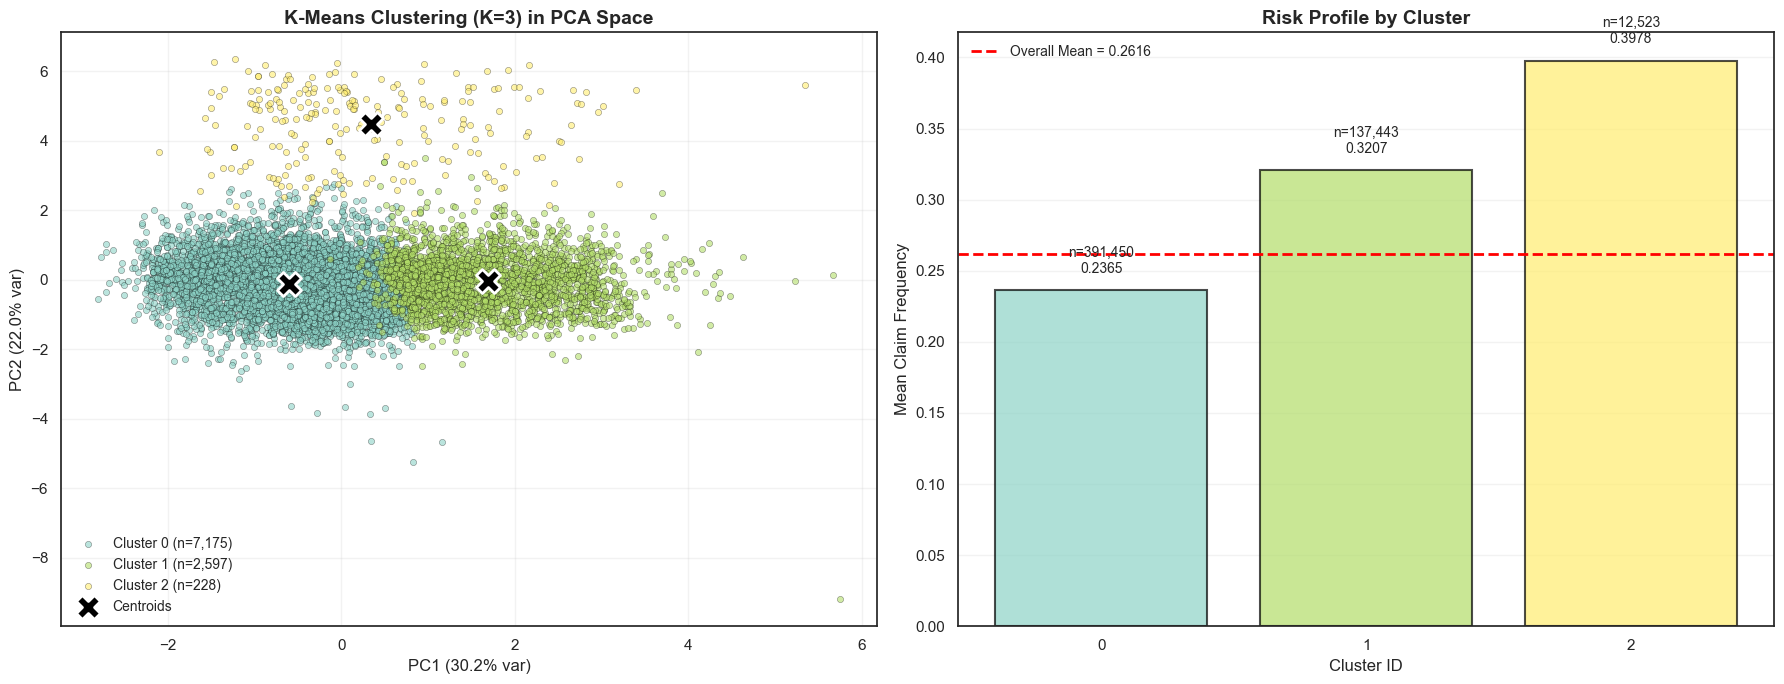


Clustering visualization:
  K=3 clusters identified
  Sampled 10,000 of 541,416 observations for visualization
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/clustering_visualization.png


In [32]:
# K-Means Clustering Visualization
# Apply final K-Means model and visualize clusters in PCA space

# Choose optimal K based on elbow/silhouette analysis
optimal_k = 3

print(f"K-MEANS CLUSTERING WITH K={optimal_k}")
print()

# Fit K-Means with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=SEED, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_for_clustering)

print(f"Clustering complete with K={optimal_k}")
print(f"  Inertia: {kmeans_final.inertia_:,.2f}")
print()

# Cluster Analysis
print("CLUSTER ANALYSIS")
cluster_stats = []

for cluster_id in range(optimal_k):
    cluster_mask = cluster_labels == cluster_id
    cluster_data = df_train_scaled[TARGET_COL][cluster_mask]
    
    cluster_stats.append({
        'Cluster': cluster_id,
        'Count': cluster_mask.sum(),
        'Percent': cluster_mask.sum() / len(df_train_scaled) * 100,
        'Mean': cluster_data.mean(),
        'Median': cluster_data.median(),
        'Std': cluster_data.std()
    })

# Print cluster statistics
print(f"\n{'Cluster':<10} {'Count':>10} {'%':>7} {'Mean':>10} {'Median':>10} {'Std':>10}")
for stats in cluster_stats:
    print(f"Cluster {stats['Cluster']:<2} {stats['Count']:>10,} {stats['Percent']:>6.2f}% "
          f"{stats['Mean']:>10.4f} {stats['Median']:>10.4f} {stats['Std']:>10.4f}")

# Overall statistics
overall_mean = df_train_scaled[TARGET_COL].mean()
overall_median = df_train_scaled[TARGET_COL].median()
overall_std = df_train_scaled[TARGET_COL].std()
print(f"{'Overall':<10} {len(df_train_scaled):>10,} {100.0:>6.2f}% "
      f"{overall_mean:>10.4f} {overall_median:>10.4f} {overall_std:>10.4f}")

# Visualize clusters in PCA space
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Sample for visualization (use existing PCA-transformed data)
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_full))
sample_idx = np.random.choice(len(X_pca_full), size=sample_size, replace=False)

X_pca_sampled = X_pca_full[sample_idx]
clusters_sampled = cluster_labels[sample_idx]
y_sampled = df_train_scaled[TARGET_COL].values[sample_idx]

# Plot 1: Clusters in PCA space
ax1 = axes[0]
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for cluster_id in range(optimal_k):
    cluster_mask = clusters_sampled == cluster_id
    ax1.scatter(
        X_pca_sampled[cluster_mask, 0], 
        X_pca_sampled[cluster_mask, 1],
        c=[colors[cluster_id]], 
        label=f'Cluster {cluster_id} (n={cluster_mask.sum():,})',
        alpha=0.6, 
        s=20, 
        edgecolors='black', 
        linewidth=0.3
    )

# Plot cluster centers in PCA space
centers_pca = pca_2d.transform(kmeans_final.cluster_centers_)
ax1.scatter(
    centers_pca[:, 0], 
    centers_pca[:, 1], 
    c='black', 
    marker='X', 
    s=300, 
    edgecolors='white', 
    linewidth=2,
    label='Centroids', 
    zorder=10
)

# Get variance explained from pca_2d
var_explained_2d = pca_2d.explained_variance_ratio_

ax1.set_xlabel(f'PC1 ({var_explained_2d[0]*100:.1f}% var)', fontsize=12)
ax1.set_ylabel(f'PC2 ({var_explained_2d[1]*100:.1f}% var)', fontsize=12)
ax1.set_title(f'K-Means Clustering (K={optimal_k}) in PCA Space', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.25)

# Plot 2: Cluster risk profile
ax2 = axes[1]
cluster_means = [df_train_scaled[TARGET_COL][cluster_labels == i].mean() 
                for i in range(optimal_k)]
cluster_counts = [np.sum(cluster_labels == i) for i in range(optimal_k)]

bars = ax2.bar(
    range(optimal_k), 
    cluster_means, 
    color=colors, 
    alpha=0.7, 
    edgecolor='black', 
    linewidth=1.5
)

# Add labels on bars
for i, (bar, count, mean) in enumerate(zip(bars, cluster_counts, cluster_means)):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.01,
        f'n={count:,}\n{mean:.4f}',
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Add overall mean line
ax2.axhline(
    overall_mean, 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label=f'Overall Mean = {overall_mean:.4f}'
)

ax2.set_xlabel('Cluster ID', fontsize=12)
ax2.set_ylabel('Mean Claim Frequency', fontsize=12)
ax2.set_title('Risk Profile by Cluster', fontsize=14, fontweight='bold')
ax2.set_xticks(range(optimal_k))
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.25, axis='y')

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'clustering_visualization.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClustering visualization:")
print(f"  K={optimal_k} clusters identified")
print(f"  Sampled {sample_size:,} of {len(X_pca_full):,} observations for visualization")
print(f"  Figure saved: {output_path}")

3D CLUSTERING VISUALIZATION



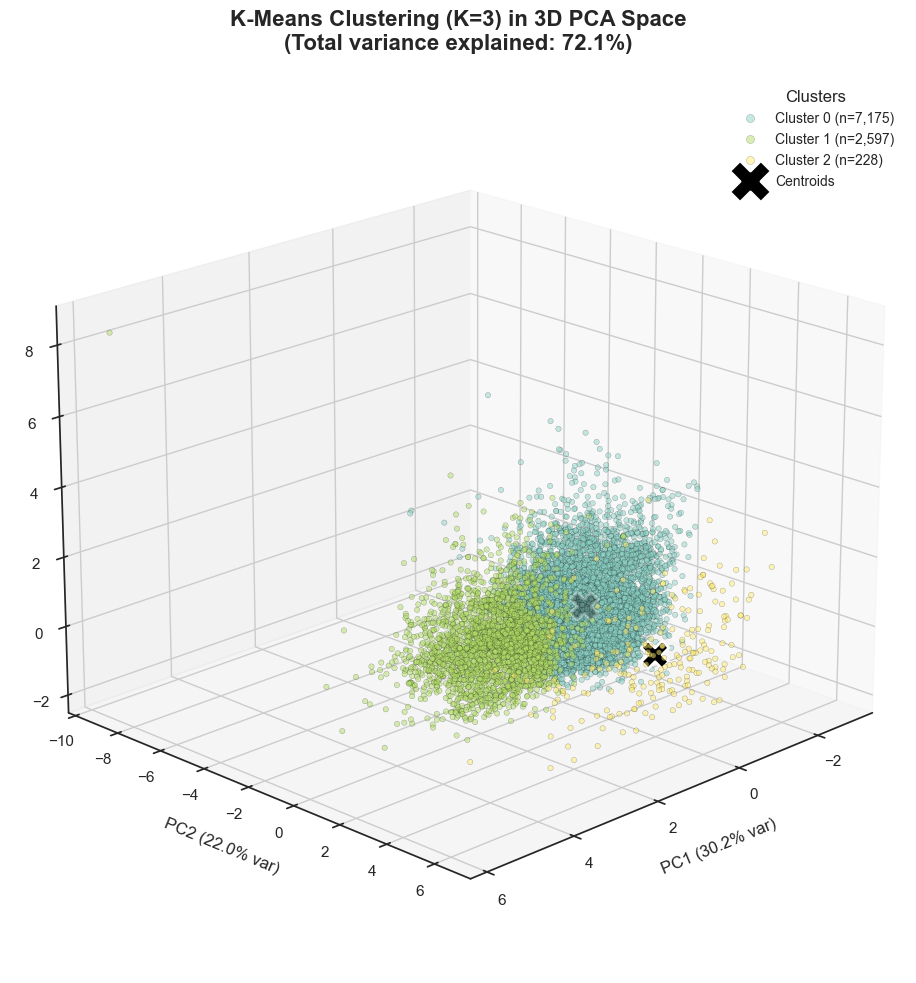

3D clustering visualization:
  K=3 clusters in 3D PCA space
  Total variance (PC1+PC2+PC3): 72.14%
  Sampled 10,000 of 541,416 observations
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/clustering_3d_pca.png


In [33]:
# K-Means Clustering in 3D PCA Space
# Visualize clusters using first 3 principal components

from mpl_toolkits.mplot3d import Axes3D

print("3D CLUSTERING VISUALIZATION")
print()

# Sample for visualization (use existing 3D PCA data)
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_3d))
sample_idx = np.random.choice(len(X_pca_3d), size=sample_size, replace=False)

X_pca_3d_sampled = X_pca_3d[sample_idx]
clusters_3d_sampled = cluster_labels[sample_idx]

# Create 3D figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Use same colors as 2D plot
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

# Plot each cluster
for cluster_id in range(optimal_k):
    cluster_mask = clusters_3d_sampled == cluster_id
    ax.scatter(
        X_pca_3d_sampled[cluster_mask, 0],
        X_pca_3d_sampled[cluster_mask, 1],
        X_pca_3d_sampled[cluster_mask, 2],
        c=[colors[cluster_id]],
        label=f'Cluster {cluster_id} (n={cluster_mask.sum():,})',
        alpha=0.5,
        s=15,
        edgecolors='black',
        linewidth=0.2
    )

# Transform cluster centers to 3D PCA space
centers_3d = pca_3d.transform(kmeans_final.cluster_centers_)

# Plot cluster centroids
ax.scatter(
    centers_3d[:, 0],
    centers_3d[:, 1],
    centers_3d[:, 2],
    c='black',
    marker='X',
    s=400,
    edgecolors='white',
    linewidth=2,
    label='Centroids',
    zorder=10
)

# Get variance explained for labels
var_exp_3d = pca_3d.explained_variance_ratio_
total_var_3d = (var_exp_3d[0] + var_exp_3d[1] + var_exp_3d[2]) * 100

# Axis labels
ax.set_xlabel(f'PC1 ({var_exp_3d[0]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_ylabel(f'PC2 ({var_exp_3d[1]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_zlabel(f'PC3 ({var_exp_3d[2]*100:.1f}% var)', fontsize=12, labelpad=10)

# Title
ax.set_title(
    f'K-Means Clustering (K={optimal_k}) in 3D PCA Space\n(Total variance explained: {total_var_3d:.1f}%)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Legend
ax.legend(
    loc='upper right',
    fontsize=10,
    markerscale=1.5,
    framealpha=0.9,
    title='Clusters'
)

# Grid styling
ax.grid(True, alpha=0.25)

# Adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'clustering_3d_pca.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"3D clustering visualization:")
print(f"  K={optimal_k} clusters in 3D PCA space")
print(f"  Total variance (PC1+PC2+PC3): {total_var_3d:.2f}%")
print(f"  Sampled {sample_size:,} of {len(X_pca_3d):,} observations")
print(f"  Figure saved: {output_path}")


In [34]:
# Encode Categorical Features for PCA Analysis
# Apply proper encoding: ordinal for Area, one-hot for nominal features
# This will be used for PCA analysis that includes categorical variables

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

print("ENCODING CATEGORICAL FEATURES")
print()

# Separate numerical (already scaled) and categorical features
X_numerical_scaled = df_train_scaled[[col + SCALED_SUFFIX for col in NUMERICAL_FEATURES]].values

print(f"Numerical features: {len(NUMERICAL_FEATURES)} (scaled)")
print(f"  Features: {NUMERICAL_FEATURES}")

# Encode ordinal features (Area)
ordinal_encoder = OrdinalEncoder(categories=[AREA_ORDER])
X_ordinal = ordinal_encoder.fit_transform(df_train_scaled[ORDINAL_FEATURES])

print(f"\nOrdinal features: {len(ORDINAL_FEATURES)}")
print(f"  Features: {ORDINAL_FEATURES}")
print(f"  Encoding: {AREA_ORDER} → 0, 1, 2, 3, 4, 5")

# One-hot encode nominal features (VehBrand, VehGas, Region)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_nominal = onehot_encoder.fit_transform(df_train_scaled[NOMINAL_FEATURES])

# Get one-hot encoded feature names
nominal_feature_names = onehot_encoder.get_feature_names_out(NOMINAL_FEATURES)

print(f"\nNominal features: {len(NOMINAL_FEATURES)}")
print(f"  Features: {NOMINAL_FEATURES}")
print(f"  One-hot encoded features: {len(nominal_feature_names)}")

# Combine all features: numerical (scaled) + ordinal + one-hot nominal
X_full_encoded = np.hstack([X_numerical_scaled, X_ordinal, X_nominal])

# Create feature names for the combined dataset
numerical_names = [col + SCALED_SUFFIX for col in NUMERICAL_FEATURES]
ordinal_names = list(ORDINAL_FEATURES)
full_feature_names = numerical_names + ordinal_names + list(nominal_feature_names)

print(f"\nCombined dataset for PCA:")
print(f"  Total features: {X_full_encoded.shape[1]}")
print(f"    - Numerical (scaled): {len(NUMERICAL_FEATURES)}")
print(f"    - Ordinal (Area): {len(ORDINAL_FEATURES)}")
print(f"    - One-hot nominal: {len(nominal_feature_names)}")
print(f"  Shape: {X_full_encoded.shape}")
print()
print("Dataset ready for PCA analysis with categorical features included.")


ENCODING CATEGORICAL FEATURES

Numerical features: 5 (scaled)
  Features: ['VehPower', 'VehAge', 'DrivAge', 'Density', 'BonusMalus']

Ordinal features: 1
  Features: ['Area']
  Encoding: ['A', 'B', 'C', 'D', 'E', 'F'] → 0, 1, 2, 3, 4, 5

Nominal features: 3
  Features: ['VehBrand', 'VehGas', 'Region']
  One-hot encoded features: 32

Combined dataset for PCA:
  Total features: 38
    - Numerical (scaled): 5
    - Ordinal (Area): 1
    - One-hot nominal: 32
  Shape: (541416, 38)

Dataset ready for PCA analysis with categorical features included.


PCA SCREE ANALYSIS - ALL FEATURES

Input: X_full_encoded
  Samples: 541,416
  Features: 38
    - Numerical (scaled): 5
    - Ordinal (Area): 1
    - One-hot nominal: 32

Total components: 38

Variance explained by first 10 components:
  PC 1:  28.87%  (Cumulative:  28.87%)
  PC 2:  17.52%  (Cumulative:  46.39%)
  PC 3:  11.70%  (Cumulative:  58.09%)
  PC 4:  11.64%  (Cumulative:  69.72%)
  PC 5:   6.21%  (Cumulative:  75.94%)
  PC 6:   5.94%  (Cumulative:  81.88%)
  PC 7:   2.89%  (Cumulative:  84.77%)
  PC 8:   2.28%  (Cumulative:  87.04%)
  PC 9:   1.86%  (Cumulative:  88.90%)
  PC10:   1.50%  (Cumulative:  90.40%)

Components needed for variance thresholds:
  80% variance: 6 components (81.88%)
  90% variance: 10 components (90.40%)
  95% variance: 16 components (95.44%)


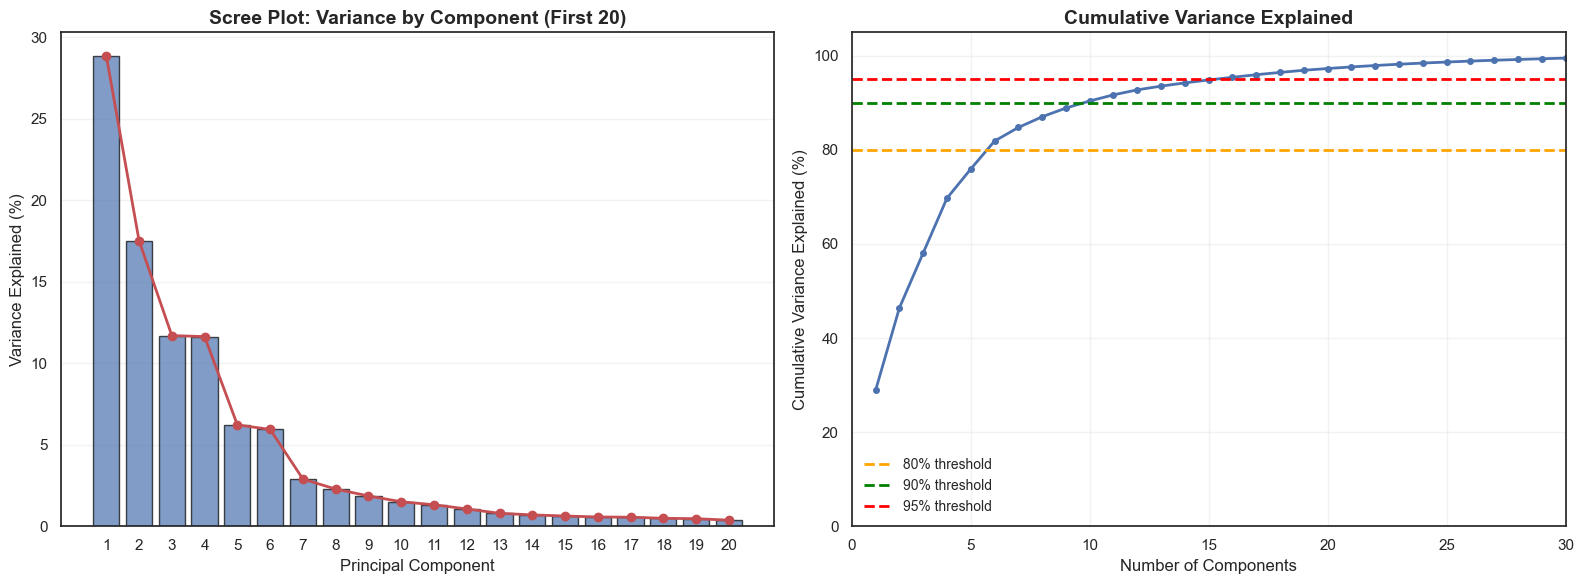


Scree plot saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/pca_scree_all_features.png


In [35]:
# PCA Scree Analysis - All Features (Numerical + Categorical)
# Analyze variance explained by principal components using full encoded dataset

from sklearn.decomposition import PCA

print("PCA SCREE ANALYSIS - ALL FEATURES")
print()

print(f"Input: X_full_encoded")
print(f"  Samples: {X_full_encoded.shape[0]:,}")
print(f"  Features: {X_full_encoded.shape[1]}")
print(f"    - Numerical (scaled): {len(NUMERICAL_FEATURES)}")
print(f"    - Ordinal (Area): {len(ORDINAL_FEATURES)}")
print(f"    - One-hot nominal: {len(nominal_feature_names)}")

# Fit PCA with all components
pca_full_features = PCA(n_components=None)
pca_full_features.fit(X_full_encoded)

# Get variance explained
var_explained = pca_full_features.explained_variance_ratio_
cumulative_var = np.cumsum(var_explained)

n_components = len(var_explained)

print(f"\nTotal components: {n_components}")
print(f"\nVariance explained by first 10 components:")
for i in range(min(10, n_components)):
    print(f"  PC{i+1:2d}: {var_explained[i]*100:>6.2f}%  (Cumulative: {cumulative_var[i]*100:>6.2f}%)")

# Find number of components for key thresholds
threshold_80 = np.argmax(cumulative_var >= 0.80) + 1
threshold_90 = np.argmax(cumulative_var >= 0.90) + 1
threshold_95 = np.argmax(cumulative_var >= 0.95) + 1

print(f"\nComponents needed for variance thresholds:")
print(f"  80% variance: {threshold_80} components ({cumulative_var[threshold_80-1]*100:.2f}%)")
print(f"  90% variance: {threshold_90} components ({cumulative_var[threshold_90-1]*100:.2f}%)")
print(f"  95% variance: {threshold_95} components ({cumulative_var[threshold_95-1]*100:.2f}%)")

# Visualization: Scree plot and cumulative variance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scree plot (variance explained by each component)
ax1 = axes[0]
components_to_plot = min(20, n_components)
ax1.bar(range(1, components_to_plot + 1), var_explained[:components_to_plot] * 100, 
        alpha=0.7, edgecolor='black', linewidth=1)
ax1.plot(range(1, components_to_plot + 1), var_explained[:components_to_plot] * 100, 
         'ro-', linewidth=2, markersize=6)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Variance Explained (%)', fontsize=12)
ax1.set_title(f'Scree Plot: Variance by Component (First {components_to_plot})', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.25, axis='y')
ax1.set_xticks(range(1, components_to_plot + 1))

# Plot 2: Cumulative variance explained
ax2 = axes[1]
ax2.plot(range(1, n_components + 1), cumulative_var * 100, 
         'b-', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=80, color='orange', linestyle='--', linewidth=2, label='80% threshold')
ax2.axhline(y=90, color='green', linestyle='--', linewidth=2, label='90% threshold')
ax2.axhline(y=95, color='red', linestyle='--', linewidth=2, label='95% threshold')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.25)
ax2.legend(fontsize=10)
ax2.set_xlim(0, min(30, n_components))
ax2.set_ylim(0, 105)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'pca_scree_all_features.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nScree plot saved: {output_path}")


PCA PAIRPLOT: FIRST 4 COMPONENTS

Variance explained by first 4 components:
  PC1: 28.87%
  PC2: 17.52%
  PC3: 11.70%
  PC4: 11.64%
  Total: 69.72%


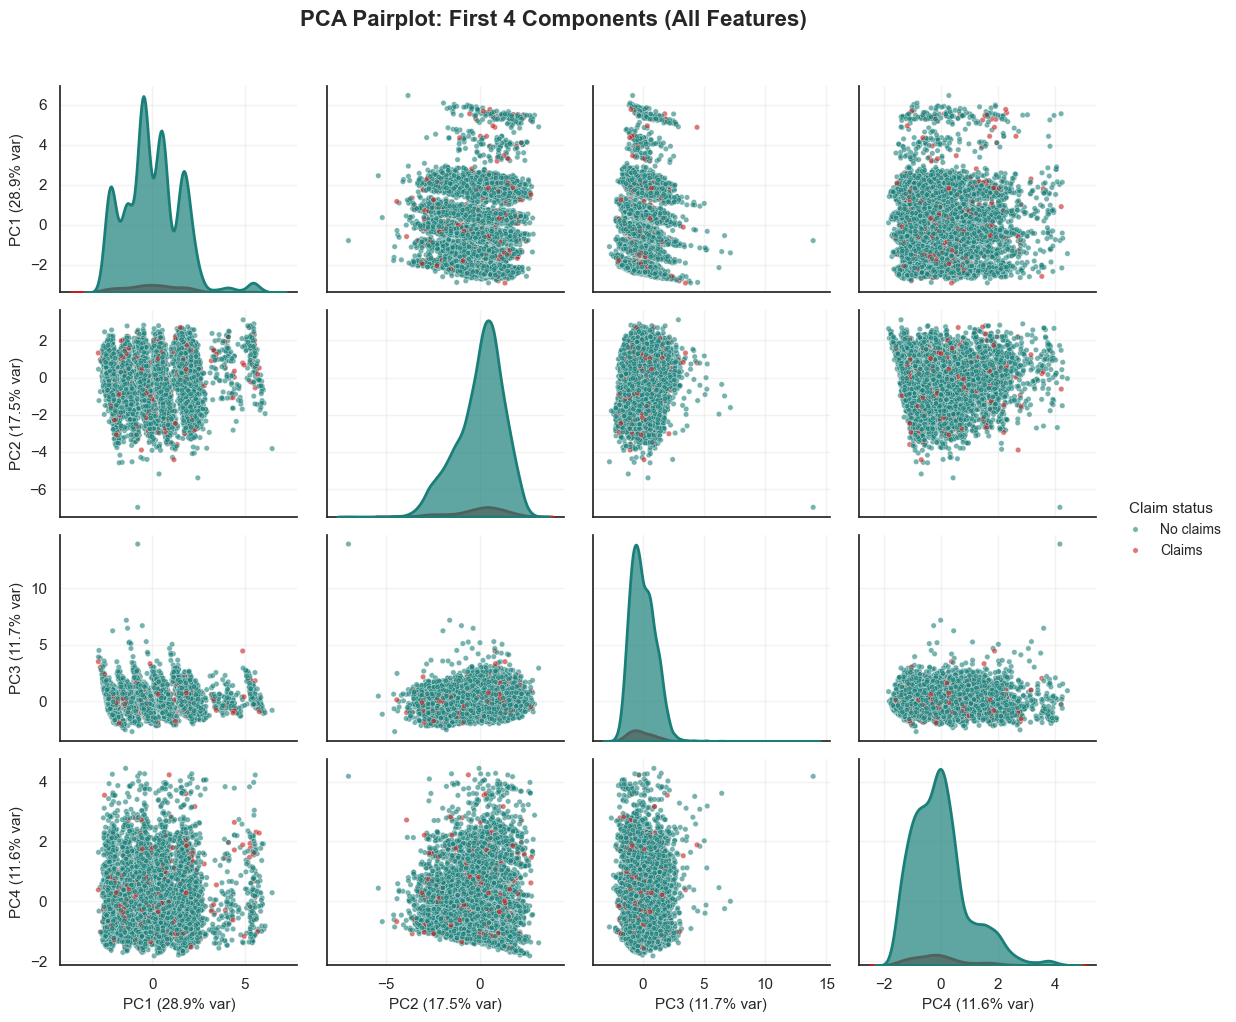


Pairplot visualization:
  Sampled 10,000 of 541,416 observations
  Total variance captured: 69.72%
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/pca_pairplot_4comp_all_features.png


In [36]:
# PCA Pairplot - First 4 Components (All Features)
# Compare relationships between first 4 principal components

print("PCA PAIRPLOT: FIRST 4 COMPONENTS")
print()

# Transform data to first 4 principal components
pca_4comp = PCA(n_components=4)
X_pca_4comp = pca_4comp.fit_transform(X_full_encoded)

# Get variance explained by each component
var_exp_4comp = pca_4comp.explained_variance_ratio_

print(f"Variance explained by first 4 components:")
for i in range(4):
    print(f"  PC{i+1}: {var_exp_4comp[i]*100:.2f}%")
print(f"  Total: {var_exp_4comp.sum()*100:.2f}%")

# Sample for visualization (pairplot can be slow with many points)
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_4comp))
sample_idx = np.random.choice(len(X_pca_4comp), size=sample_size, replace=False)

# Create labels with variance explained
pc1_label = f'PC1 ({var_exp_4comp[0]*100:.1f}% var)'
pc2_label = f'PC2 ({var_exp_4comp[1]*100:.1f}% var)'
pc3_label = f'PC3 ({var_exp_4comp[2]*100:.1f}% var)'
pc4_label = f'PC4 ({var_exp_4comp[3]*100:.1f}% var)'

# Create dataframe for pairplot
pca_4comp_df = pd.DataFrame({
    pc1_label: X_pca_4comp[sample_idx, 0],
    pc2_label: X_pca_4comp[sample_idx, 1],
    pc3_label: X_pca_4comp[sample_idx, 2],
    pc4_label: X_pca_4comp[sample_idx, 3]
})

# Get target values for sampled observations
pca_4comp_df[TARGET_COL] = df_train_scaled[TARGET_COL].values[sample_idx]

# Create binary label for coloring (consistent with earlier plots)
pca_4comp_df['Claim status'] = np.where(
    pca_4comp_df[TARGET_COL] == 0,
    'No claims',
    'Claims'
)

# Create pairplot
sns.set_theme(style="white")

g = sns.pairplot(
    pca_4comp_df,
    vars=[pc1_label, pc2_label, pc3_label, pc4_label],
    hue='Claim status',
    hue_order=['No claims', 'Claims'],
    palette={'No claims': '#1B7F79', 'Claims': '#C71F1F'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 15},
    diag_kws={'alpha': 0.7, 'linewidth': 2},
    corner=False
)

# Title
g.fig.suptitle(
    'PCA Pairplot: First 4 Components (All Features)',
    y=1.02,
    fontsize=16,
    fontweight='bold'
)

# Grid and axis labels
for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(True, alpha=0.25)
        ax.set_xlabel(ax.get_xlabel(), fontsize=11)
        ax.set_ylabel(ax.get_ylabel(), fontsize=11)

old_legend = g._legend
handles = old_legend.legend_handles
labels = ['No claims', 'Claims']
old_legend.remove()

g.fig.legend(
    handles,
    labels,
    title='Claim status',
    loc='center right',
    bbox_to_anchor=(1.10, 0.5),
    borderaxespad=0.,
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'pca_pairplot_4comp_all_features.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPairplot visualization:")
print(f"  Sampled {sample_size:,} of {len(X_pca_4comp):,} observations")
print(f"  Total variance captured: {var_exp_4comp.sum()*100:.2f}%")
print(f"  Figure saved: {output_path}")

# Clean up
pca_4comp_df.drop('Claim status', axis=1, inplace=True)


3D PCA VISUALIZATION - ALL FEATURES

Variance explained by first 3 components:
  PC1: 28.87%
  PC2: 17.52%
  PC3: 11.70%
  Total: 58.09%


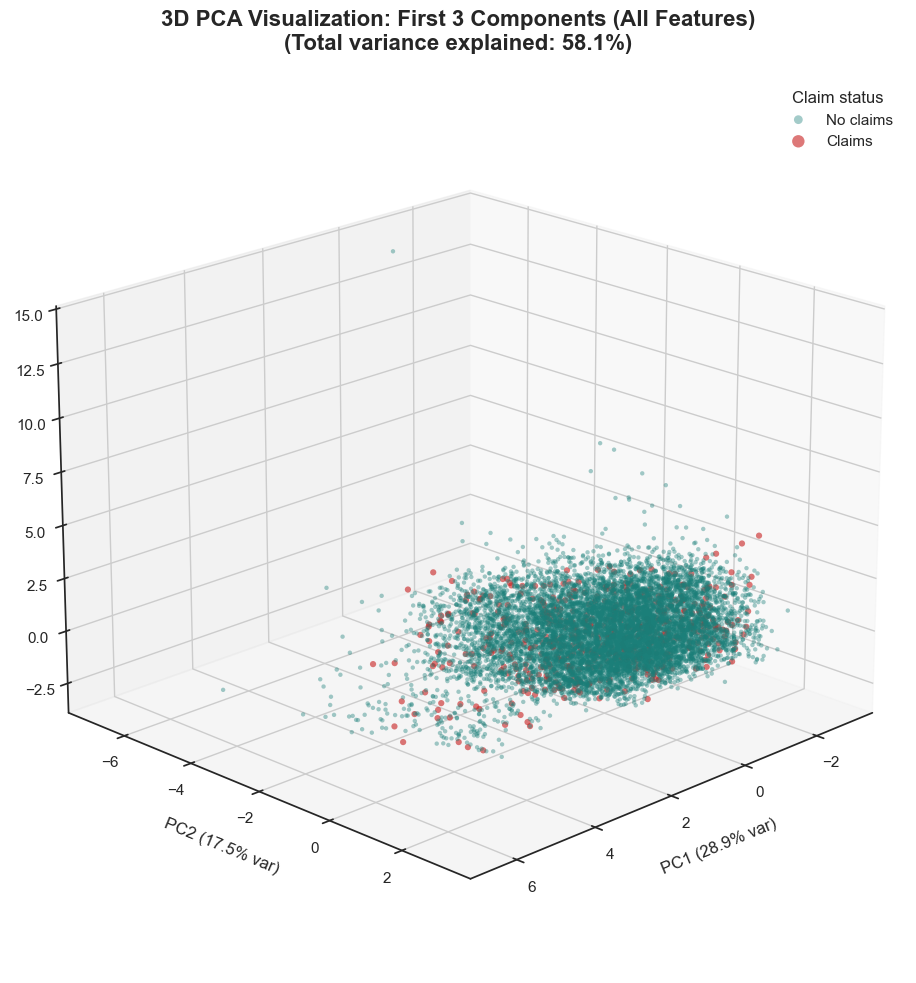


3D PCA plot (all features):
  Total variance (PC1+PC2+PC3): 58.09%
  Sampled: 10,000 of 541,416 observations
  No claims: 9,485 (94.8%)
  Claims: 515 (5.1%)
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/pca_3d_all_features.png


In [37]:
# 3D PCA Visualization - First 3 Components (All Features)
# 3D scatter plot showing first 3 principal components with all features included

from mpl_toolkits.mplot3d import Axes3D

print("3D PCA VISUALIZATION - ALL FEATURES")
print()

# Transform to first 3 principal components
pca_3comp_all = PCA(n_components=3)
X_pca_3comp_all = pca_3comp_all.fit_transform(X_full_encoded)

# Get variance explained
var_exp_3comp_all = pca_3comp_all.explained_variance_ratio_
total_var_3comp = (var_exp_3comp_all[0] + var_exp_3comp_all[1] + var_exp_3comp_all[2]) * 100

print(f"Variance explained by first 3 components:")
for i in range(3):
    print(f"  PC{i+1}: {var_exp_3comp_all[i]*100:.2f}%")
print(f"  Total: {total_var_3comp:.2f}%")

# Sample for visualization
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_3comp_all))
sample_idx = np.random.choice(len(X_pca_3comp_all), size=sample_size, replace=False)

# Get sampled PCA coordinates
X_pca_sampled = X_pca_3comp_all[sample_idx]

# Get target values for sampled observations
y_sampled = df_train_scaled[TARGET_COL].values[sample_idx]

# Create binary masks for coloring (consistent with previous plots)
no_claims_mask = (y_sampled == 0)
has_claims_mask = ~no_claims_mask

# Create 3D figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot no claims (teal)
ax.scatter(
    X_pca_sampled[no_claims_mask, 0],
    X_pca_sampled[no_claims_mask, 1],
    X_pca_sampled[no_claims_mask, 2],
    c='#1B7F79',  # Teal (consistent with other plots)
    alpha=0.4,
    s=10,
    label='No claims',
    edgecolors='none'
)

# Plot claims (red)
ax.scatter(
    X_pca_sampled[has_claims_mask, 0],
    X_pca_sampled[has_claims_mask, 1],
    X_pca_sampled[has_claims_mask, 2],
    c='#C71F1F',  # Red (consistent with other plots)
    alpha=0.6,
    s=20,
    label='Claims',
    edgecolors='none'
)

# Axis labels with variance explained
ax.set_xlabel(f'PC1 ({var_exp_3comp_all[0]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_ylabel(f'PC2 ({var_exp_3comp_all[1]*100:.1f}% var)', fontsize=12, labelpad=10)
ax.set_zlabel(f'PC3 ({var_exp_3comp_all[2]*100:.1f}% var)', fontsize=12, labelpad=10)

# Title
ax.set_title(
    f'3D PCA Visualization: First 3 Components (All Features)\n(Total variance explained: {total_var_3comp:.1f}%)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Legend
ax.legend(
    loc='upper right',
    fontsize=11,
    markerscale=2,
    framealpha=0.9,
    title='Claim status'
)

# Grid styling
ax.grid(True, alpha=0.25)

# Adjust viewing angle for better perspective
ax.view_init(elev=20, azim=45)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'pca_3d_all_features.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n3D PCA plot (all features):")
print(f"  Total variance (PC1+PC2+PC3): {total_var_3comp:.2f}%")
print(f"  Sampled: {sample_size:,} of {len(X_pca_3comp_all):,} observations")
print(f"  No claims: {no_claims_mask.sum():,} ({no_claims_mask.sum()/sample_size*100:.1f}%)")
print(f"  Claims: {has_claims_mask.sum():,} ({has_claims_mask.sum()/sample_size*100:.1f}%)")
print(f"  Figure saved: {output_path}")


K-MEANS CLUSTERING - ELBOW METHOD (ALL FEATURES)

Input: X_full_encoded
  Features: 38 (numerical + categorical)
  Samples: 541,416

Testing K values from 2 to 10...
  K= 2  Inertia:    3,785,918.57  Silhouette: 0.1720
  K= 3  Inertia:    3,369,929.80  Silhouette: 0.1722
  K= 4  Inertia:    3,022,632.54  Silhouette: 0.1681
  K= 5  Inertia:    2,797,830.19  Silhouette: 0.1661
  K= 6  Inertia:    2,616,782.80  Silhouette: 0.1376
  K= 7  Inertia:    2,466,964.77  Silhouette: 0.1379
  K= 8  Inertia:    2,360,554.25  Silhouette: 0.1355
  K= 9  Inertia:    2,270,354.24  Silhouette: 0.1280
  K=10  Inertia:    2,192,317.22  Silhouette: 0.1204


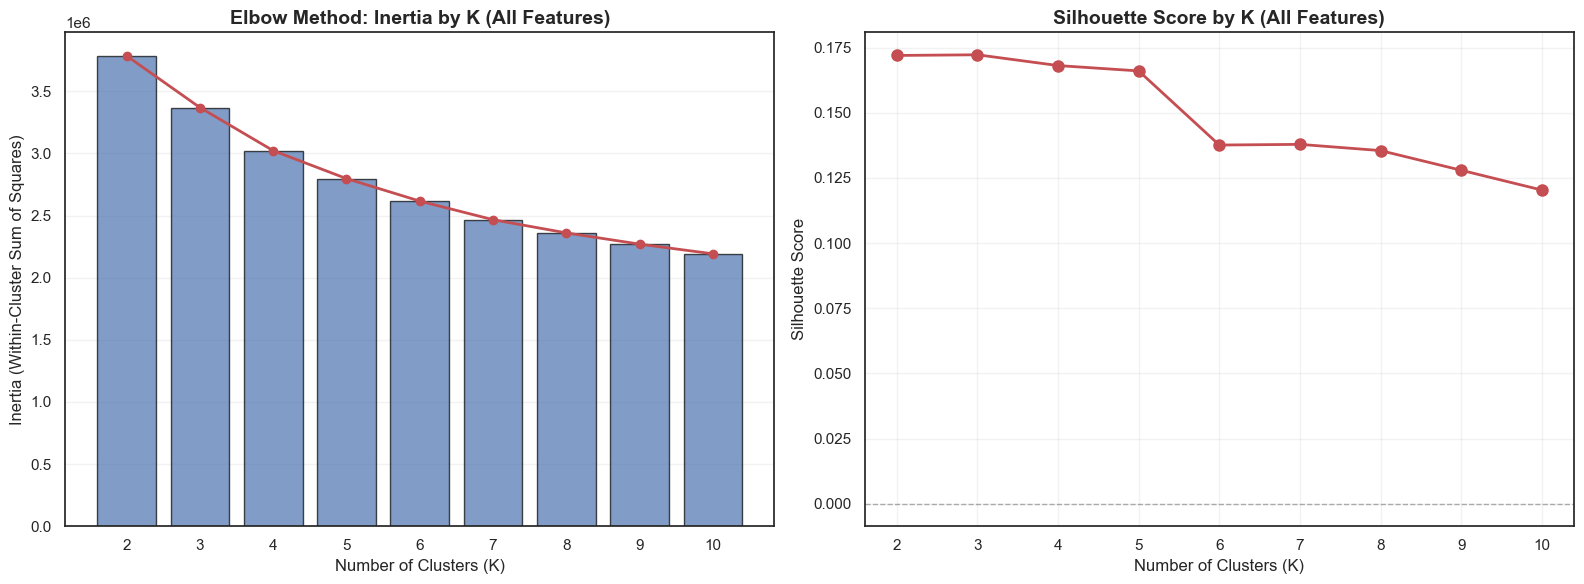


Elbow method visualization (all features):
  Best K can be identified where inertia 'elbow' occurs
  Higher silhouette scores indicate better cluster separation
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/clustering_elbow_all_features.png


In [38]:
# K-Means Clustering - Elbow Method (All Features)
# Determine optimal number of clusters using all encoded features

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("K-MEANS CLUSTERING - ELBOW METHOD (ALL FEATURES)")
print()

print(f"Input: X_full_encoded")
print(f"  Features: {X_full_encoded.shape[1]} (numerical + categorical)")
print(f"  Samples: {X_full_encoded.shape[0]:,}")

# Test different K values
k_range = range(2, 11)
inertias_all = []
silhouette_scores_all = []

print(f"\nTesting K values from {min(k_range)} to {max(k_range)}...")

for k in k_range:
    # Fit K-Means with current k
    kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    kmeans.fit(X_full_encoded)
    inertias_all.append(kmeans.inertia_)
    
    # Calculate silhouette score on a sample (for computational efficiency)
    np.random.seed(SEED)
    sample_size = min(10000, len(X_full_encoded))
    sample_idx = np.random.choice(len(X_full_encoded), size=sample_size, replace=False)
    silhouette_avg = silhouette_score(
        X_full_encoded[sample_idx], 
        kmeans.labels_[sample_idx]
    )
    silhouette_scores_all.append(silhouette_avg)
    
    print(f"  K={k:2d}  Inertia: {kmeans.inertia_:>15,.2f}  Silhouette: {silhouette_avg:>6.4f}")

# Create dual plot: Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Inertia (Elbow curve)
ax1 = axes[0]
ax1.bar(k_range, inertias_all, alpha=0.7, edgecolor='black', linewidth=1)
ax1.plot(k_range, inertias_all, 'ro-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax1.set_title('Elbow Method: Inertia by K (All Features)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.25, axis='y')
ax1.set_xticks(k_range)

# Plot 2: Silhouette scores
ax2 = axes[1]
ax2.plot(k_range, silhouette_scores_all, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score by K (All Features)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.25)
ax2.set_xticks(k_range)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'clustering_elbow_all_features.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nElbow method visualization (all features):")
print(f"  Best K can be identified where inertia 'elbow' occurs")
print(f"  Higher silhouette scores indicate better cluster separation")
print(f"  Figure saved: {output_path}")


K-MEANS CLUSTERING WITH K=3 (ALL FEATURES)

Clustering complete with K=3
  Inertia: 3,369,929.80

CLUSTER ANALYSIS

Cluster         Count       %       Mean     Median        Std
Cluster 0     104,083  19.22%     0.3534     0.0000     5.1738
Cluster 1     249,370  46.06%     0.2166     0.0000     4.0775
Cluster 2     187,963  34.72%     0.2704     0.0000     4.4380
Overall       541,416 100.00%     0.2616     0.0000     4.4322


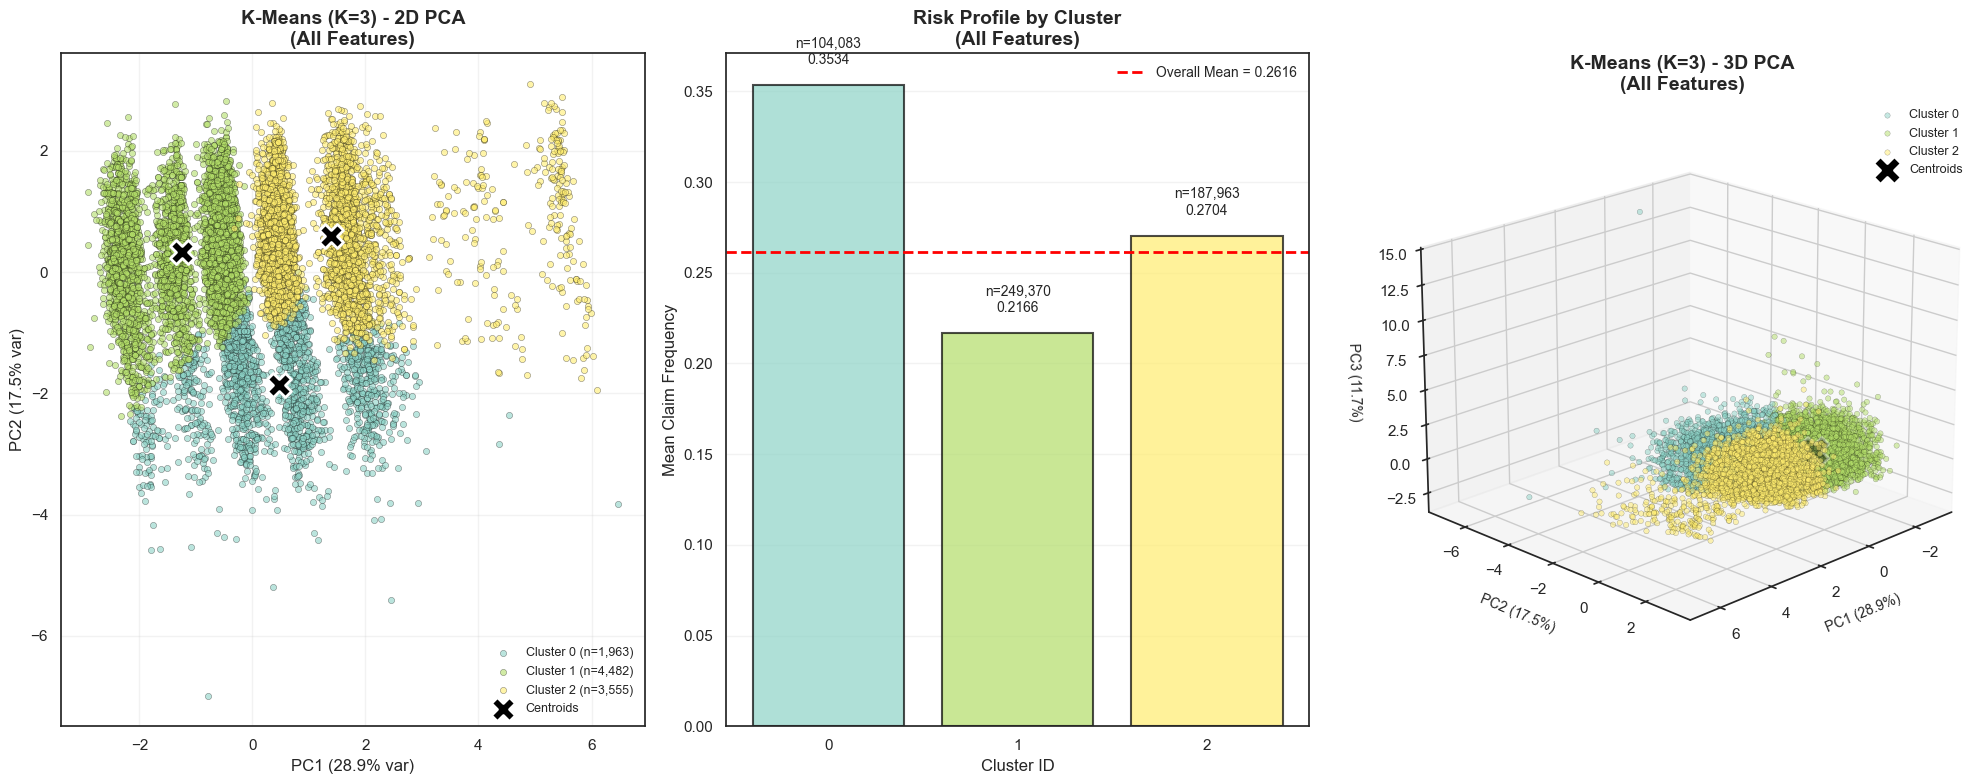


Clustering visualization (all features):
  K=3 clusters identified
  Sampled 10,000 of 541,416 observations for visualization
  Figure saved: /Users/matteo/Desktop/TRYG_ML/notebooks/../figures/clustering_visualization_all_features.png


In [39]:
# K-Means Clustering Visualization (All Features)
# Apply final K-Means model and visualize clusters in PCA space

# Choose optimal K based on elbow/silhouette analysis
optimal_k_all = 3

print(f"K-MEANS CLUSTERING WITH K={optimal_k_all} (ALL FEATURES)")
print()

# Fit K-Means with optimal K
kmeans_final_all = KMeans(n_clusters=optimal_k_all, random_state=SEED, n_init=10)
cluster_labels_all = kmeans_final_all.fit_predict(X_full_encoded)

print(f"Clustering complete with K={optimal_k_all}")
print(f"  Inertia: {kmeans_final_all.inertia_:,.2f}")
print()

# Cluster Analysis
print("CLUSTER ANALYSIS")
cluster_stats_all = []

for cluster_id in range(optimal_k_all):
    cluster_mask = cluster_labels_all == cluster_id
    cluster_data = df_train_scaled[TARGET_COL][cluster_mask]
    
    cluster_stats_all.append({
        'Cluster': cluster_id,
        'Count': cluster_mask.sum(),
        'Percent': cluster_mask.sum() / len(df_train_scaled) * 100,
        'Mean': cluster_data.mean(),
        'Median': cluster_data.median(),
        'Std': cluster_data.std()
    })

# Print cluster statistics
print(f"\n{'Cluster':<10} {'Count':>10} {'%':>7} {'Mean':>10} {'Median':>10} {'Std':>10}")
for stats in cluster_stats_all:
    print(f"Cluster {stats['Cluster']:<2} {stats['Count']:>10,} {stats['Percent']:>6.2f}% "
          f"{stats['Mean']:>10.4f} {stats['Median']:>10.4f} {stats['Std']:>10.4f}")

# Overall statistics
overall_mean = df_train_scaled[TARGET_COL].mean()
overall_median = df_train_scaled[TARGET_COL].median()
overall_std = df_train_scaled[TARGET_COL].std()
print(f"{'Overall':<10} {len(df_train_scaled):>10,} {100.0:>6.2f}% "
      f"{overall_mean:>10.4f} {overall_median:>10.4f} {overall_std:>10.4f}")

# Visualize clusters in 2D and 3D PCA space
fig = plt.figure(figsize=(20, 8))

# Sample for visualization
np.random.seed(SEED)
sample_size = min(10000, len(X_pca_3comp_all))
sample_idx = np.random.choice(len(X_pca_3comp_all), size=sample_size, replace=False)

X_pca_2d_sampled = X_pca_3comp_all[sample_idx, :2]  # First 2 components
X_pca_3d_sampled = X_pca_3comp_all[sample_idx, :3]  # First 3 components
clusters_sampled = cluster_labels_all[sample_idx]

# Use same colors as previous clustering
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k_all))

# Plot 1: Clusters in 2D PCA space
ax1 = fig.add_subplot(1, 3, 1)

for cluster_id in range(optimal_k_all):
    cluster_mask = clusters_sampled == cluster_id
    ax1.scatter(
        X_pca_2d_sampled[cluster_mask, 0], 
        X_pca_2d_sampled[cluster_mask, 1],
        c=[colors[cluster_id]], 
        label=f'Cluster {cluster_id} (n={cluster_mask.sum():,})',
        alpha=0.6, 
        s=20, 
        edgecolors='black', 
        linewidth=0.3
    )

# Plot cluster centers in 2D PCA space
centers_2d_all = pca_3comp_all.transform(kmeans_final_all.cluster_centers_)[:, :2]
ax1.scatter(
    centers_2d_all[:, 0], 
    centers_2d_all[:, 1], 
    c='black', 
    marker='X', 
    s=300, 
    edgecolors='white', 
    linewidth=2,
    label='Centroids', 
    zorder=10
)

ax1.set_xlabel(f'PC1 ({var_exp_3comp_all[0]*100:.1f}% var)', fontsize=12)
ax1.set_ylabel(f'PC2 ({var_exp_3comp_all[1]*100:.1f}% var)', fontsize=12)
ax1.set_title(f'K-Means (K={optimal_k_all}) - 2D PCA\n(All Features)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=9, loc='best')
ax1.grid(True, alpha=0.25)

# Plot 2: Risk profile by cluster
ax2 = fig.add_subplot(1, 3, 2)
cluster_means = [df_train_scaled[TARGET_COL][cluster_labels_all == i].mean() 
                for i in range(optimal_k_all)]
cluster_counts = [np.sum(cluster_labels_all == i) for i in range(optimal_k_all)]

bars = ax2.bar(
    range(optimal_k_all), 
    cluster_means, 
    color=colors, 
    alpha=0.7, 
    edgecolor='black', 
    linewidth=1.5
)

# Add labels on bars
for i, (bar, count, mean) in enumerate(zip(bars, cluster_counts, cluster_means)):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2., 
        height + 0.01,
        f'n={count:,}\n{mean:.4f}',
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Add overall mean line
ax2.axhline(
    overall_mean, 
    color='red', 
    linestyle='--', 
    linewidth=2,
    label=f'Overall Mean = {overall_mean:.4f}'
)

ax2.set_xlabel('Cluster ID', fontsize=12)
ax2.set_ylabel('Mean Claim Frequency', fontsize=12)
ax2.set_title('Risk Profile by Cluster\n(All Features)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(optimal_k_all))
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.25, axis='y')

# Plot 3: Clusters in 3D PCA space
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for cluster_id in range(optimal_k_all):
    cluster_mask = clusters_sampled == cluster_id
    ax3.scatter(
        X_pca_3d_sampled[cluster_mask, 0],
        X_pca_3d_sampled[cluster_mask, 1],
        X_pca_3d_sampled[cluster_mask, 2],
        c=[colors[cluster_id]],
        label=f'Cluster {cluster_id}',
        alpha=0.5,
        s=15,
        edgecolors='black',
        linewidth=0.2
    )

# Plot cluster centers in 3D PCA space
centers_3d_all = pca_3comp_all.transform(kmeans_final_all.cluster_centers_)
ax3.scatter(
    centers_3d_all[:, 0],
    centers_3d_all[:, 1],
    centers_3d_all[:, 2],
    c='black',
    marker='X',
    s=400,
    edgecolors='white',
    linewidth=2,
    label='Centroids',
    zorder=10
)

ax3.set_xlabel(f'PC1 ({var_exp_3comp_all[0]*100:.1f}%)', fontsize=10, labelpad=8)
ax3.set_ylabel(f'PC2 ({var_exp_3comp_all[1]*100:.1f}%)', fontsize=10, labelpad=8)
ax3.set_zlabel(f'PC3 ({var_exp_3comp_all[2]*100:.1f}%)', fontsize=10, labelpad=8)
ax3.set_title(f'K-Means (K={optimal_k_all}) - 3D PCA\n(All Features)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9, loc='upper right')
ax3.grid(True, alpha=0.25)
ax3.view_init(elev=20, azim=45)

plt.tight_layout()

# Save figure
output_path = FIGURES_DIR / 'clustering_visualization_all_features.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClustering visualization (all features):")
print(f"  K={optimal_k_all} clusters identified")
print(f"  Sampled {sample_size:,} of {len(X_pca_3comp_all):,} observations for visualization")
print(f"  Figure saved: {output_path}")
